<a href="https://colab.research.google.com/github/ZAJ44269/Clasificador-de-Fases-de-sue-o/blob/main/PSB2023Q1_FINAL_JIMENEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabajo Práctico Final - Clasificador automático de fases de sueño para polisomnografía de siestas**

##### 16.15 - Procesamiento de Señales Biomédicas

### **Integrantes:**

##### > 61552 - Zahira Abril Jiménez - [zjimenez@itba.edu.ar](mailto:zjimenez@itba.edu.ar)

#ESTADO DEL ARTE

La polisomnografía se define como el estudio de sueño mediante diferentes variables fisiológicas tales como señales de Electroencefalograma (EEG),  de  Electrooculograma (EOG) y de Electromiograma (EMG) para el diagnóstico de trastornos de sueño.

El sueño de una persona se puede estudiar en función de la duración de sus ciclos de sueño y de cada una de sus etapas. Un ciclo de sueño normal dura entre 80 y 100 minutos, a lo que equivale a entre 4 y 6 ciclos de sueño por noche. Un ciclo de sueño se divide en dos grandes fases: Sueño Con Movimiento Ocular Rápido (REM) o Sin  Movimiento Ocular Rápido (NREM). A su vez, durante el sueño NREM, se presentan cuatro fases de sueño que se pueden clasificar en sueño ligero y en sueño profundo. Cada una de estas fases se puede identificar según la frecuencia de la actividad eléctrica y de diversos patrones que se presentan tanto en las señales de EEG como en las señales de EOG y EMG. La frecuencia de las señales de EEG pueden ser alfa (8 -13 Hz), beta (13-30Hz), theta (4 - 8 Hz), delta u Ondas Lentas (0.5 - 2Hz) y gamma (30- 64Hz).

Los patrones que se presentan en EEG son los llamados *spindles* o husos de sueño y Complejos K.

Cada una de ellas se suele identificar mediante una interfaz cerebro-computadora que visualiza las señales en ventanas de 30 segundos denominadas épocas. Las fases de sueño se identifican según las siguientes denotaciones:

*   Vigilia: La persona está despierta y activa. Abundante actividad alpha en EEG.
*   Fase 1 : La persona se relaja. Se encuentra en una transición entre vigilia y sueño. Aún no se considera que se encuentra dormida. Movimiento ocular oscilante. Actividad predominante en theta en EEG. Actividad baja en EMG. Forma parte de Sueño Ligero.
*   Fase 2 : En esta fase se considera que la persona se encuentra dormida. Es esperable identificar esta fase a los 15 o 20 minutos de haberse recostado. Esta fase importante ya que a partir de ella es cuando se empieza a monitorear la actividad cerebral. Esta fase se identifica mediante patrones llamados *spindles* o husos de sueño y complejos K. También es considerado Sueño Ligero.
*  Fase 3: La persona se encuentra en Sueño Profundo. Esta fase se identifica mediante la presencia de Ondas Lentas. A modo protocolar, es fase 3 si entre el 20\% y 50\% de la señal en una época de 30 segundos está conformado por Ondas Lentas. También pueden presentarse *spindles* y complejos K.

*  Fase 4 : Sueño Profundo. Más del 50\% de la señal de una época está conformado por Ondas Lentas. También pueden presentarse *spindles* y complejos K.

*  MOR : Actividad de EEG predominante theta. EOG con mucha actividad debido al movimiento ocular rápido. Relajación de los músculos mandibulares, caída de actividad de EMG.

A cada fase se le asigna una puntuación de 0, 1, 2, 3, 4, R respectivamente para luego confeccionar un hipnograma. Esta práctica de asignar puntaje a cada fase se la conoce como puntuación o *scoring* de sueño.  

Finalmente, esta puntuación puede representarse en lo que se conoce como un hipnograma. Un hipnograma consiste en una representación gráfica de las diferentes fases de sueño en función del tiempo. A partir de él, se puede obtener información inmediata acerca de cómo fue el sueño durante una noche completa e identificar, por ejemplo, trastornos de sueño como insomnio.

#PROBLEMÁTICA

En la actualidad, las prácticas de *scoring* habitualmente se realizan visualmente siguiendo los criterios mencionados previamente.

Además de tratarse de una práctica demandante, se requiere de capacitación y mucha experiencia para poder realizarla correctamente. El hecho de que se realice bajo las observaciones y criterios de diferentes profesionales, aumenta las probabilidades de presentar error.

Una solución a esto es proponer un algoritmo de clasificación de fases de sueño automática. Como queremos hacer foco en la clasificación de fases en Sueño Profundo (como en estudios de sietas cortas) y además, considerando que identificar Fase REM requiere de otros tipos de criterios más elaborados de clasificación, no se tomarán en cuenta las épocas calificadas como REM para el algoritmo propuesto.


#DISEÑO

El algoritmo llevado a cabo idealmente deberá  distinguir las fases de sueño con un accuracy mayor al 85%. Si bien existen trabajos de algoritmo clasificación automática que buscaron resolver esta problemática, mayormente utilizan por convención el sistema de clasificación postulado por la Academia Americana de Medicina del Sueño (ASSM) la cual no hace distinción entre Fase 3 y Fase 4, lo cual pueden ser de interés en diferentes aplicaciones tales cómo el estudio del Rol sueño Profundo en la consolidación de Memorias Declarativas. Por lo tanto, sería ideal que el algoritmo también distinga entre Fase 3 y Fase 4.

Los features más utilizados en trabajos similares emplean la Densidad Espectral de Potencia (PSD) y la Energía (EN). La potencia, siendo el Área Bajo la Curva de la PSD, es útil ya que brinda información propia de cada banda de frecuencia a analizar. Es esta potencia para cada banda que puede variar en función de la fase de sueño correspondiente.

A comparación de otros autores, el diseño de estos algoritmos pueden realizarse empleando diferentes abordajes. Algunos autores emplearon un único canal de EEG y otros emplean más de dos canales de EEG, pero esto último no es recomendable ya que los resultados sugieren que el número de canales no mejora significativamente la detección e incrementa el costo computacional (Zhovna & Shallom et al.,2008).

También existen trabajos que utilizan únicamente canales de EEG y otros, emplean un abordaje EMG, EOG y algunos, hasta  electrocardiograma (ECG).

Debido a que las Fases de Sueño presentan algunas distinciones propias de las señales de EMG y EOG, decidimos utilizar este último abordaje, ya que pueden emplearse otros tipos de features.

Se debe tener en cuenta que para realizar un Modelo Clasificador para 5 fases de sueño (sistema no americano), se debe disponer de un scoring en donde realice esta distinción para utilizar durante el entrenamiento. De no disponer de una base de datos con estas características, se debe realizar estas identificaciones visualmente y obtener un nuevo scoring.

Por lo tanto, nuestros objetivos son:

**De mínima**: Realizar un algoritmo que clasifique automáticamente según sistema ASSM tomando de features de señales de un canal de EEG, EMG y EOG.

**De máxima**: Realizar un algoritmo que clasifique automáticamente según sistema NO ASSM tomando de features de señales de  un canal de EEG, EMG y EOG.

#DESARROLLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install mne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 38.8 MB/s eta 0:00:00


In [ ]:
import numpy as np
import mne
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from scipy.fft import fft
import scipy.signal as sig
from scipy.stats import pearsonr

In [ ]:
from mne.preprocessing import ICA

In [ ]:
plt.style.use('dark_background')

##Data Exploring

### Funciones

In [ ]:
def normalizar_data(raw,channel_names):
  data= raw.get_data()
  channels={}
  for i, name in enumerate(channel_names):
    channels[name]=data[i]
    normalized_data = channels[name] / np.sqrt(np.sum(channels[name]** 2))
    channels[name] = normalized_data
  return channels

In [ ]:
def Archivo_xls(df, hypnogram_txt_file):
  hypnogram_df = pd.read_csv(hypnogram_txt_file)
  print("Columnas en el DataFrame antes de la limpieza:", hypnogram_df.columns)

  # Limpiar los nombres de las columnas eliminando espacios adicionales
  hypnogram_df.columns = hypnogram_df.columns.str.strip()

  # Verificar las columnas después de la limpieza
  print("Columnas en el DataFrame después de la limpieza:", hypnogram_df.columns)

  # Verificar el contenido del DataFrame
  print(hypnogram_df.head())

  # Identificar el nombre exacto de la columna de anotaciones
  annotation_column = None
  for col in hypnogram_df.columns:
      if 'Annotation' in col:
          annotation_column = col
          break

    # Asegurarse de que se encontró la columna de anotaciones
  if annotation_column is None:
      print("No se encontró una columna que contenga 'Annotation'. Las primeras filas del DataFrame son:")
      print(hypnogram_df.head())
  else:
      # Agregar la nueva columna basada en la columna de anotaciones
      print("Se encontró una columna que contiene 'Annotation'")

      def assign_stage_value(annotation):
          if annotation == ' Sleep stage W':
              return 0
          elif annotation == ' Sleep stage N1':
              return -1
          elif annotation == ' Sleep stage N2':
              return -2
          elif annotation == ' Sleep stage N3':
              return -3
          elif annotation == ' Sleep stage R':
              return 0.5
          else:
              return 3  # o algún valor por defecto

      hypnogram_df['Stage_Value'] = hypnogram_df[annotation_column].apply(assign_stage_value)

      # Verificar las modificaciones
      print(hypnogram_df.head())

  return hypnogram_df

In [ ]:
def duraciones(signal,fs):
  dur = len(signal)/fs
  t=np.linspace(0,dur,len(signal))
  print(f'{dur} segundos')
  print(f'{dur/60} minutos')
  print(f'{dur/3600} horas')
  print(len(t))
  return t, dur

In [ ]:
def hipnograma(stages):
    graf = []
    # Number of data points representing 30 seconds
    points_per_stage = 1 * fs

    # Populate graf with the stages
    for stage in stages:
        graf.extend([stage] * points_per_stage)

    return graf

# Ejemplo
"""stages_test = [0, -3, -2, -1, -5, 0]
graf2 = hipnograma(stages_test)

# Update the time array to match the length of graf2
t = np.linspace(0, 30 * len(stages_test), len(graf2))

# Graficar el hipnograma
plt.figure(figsize=(15, 5))
plt.plot(t, graf2, label='Hipnograma', color="hotpink")
plt.xlabel('Tiempo (s)')
plt.ylabel('Etapa de sueño')
plt.title('Hipnograma')
plt.legend()

plt.show()"""


'stages_test = [0, -3, -2, -1, -5, 0]\ngraf2 = hipnograma(stages_test)\n\n# Update the time array to match the length of graf2\nt = np.linspace(0, 30 * len(stages_test), len(graf2))\n\n# Graficar el hipnograma\nplt.figure(figsize=(15, 5))\nplt.plot(t, graf2, label=\'Hipnograma\', color="hotpink")\nplt.xlabel(\'Tiempo (s)\')\nplt.ylabel(\'Etapa de sueño\')\nplt.title(\'Hipnograma\')\nplt.legend()\n\nplt.show()'

### SN007

In [ ]:
eeg_file_S7 = '/content/drive/MyDrive/ZAJ/PSB/TP Final PSB polisomnonografía/DB/SN007/SN007.edf'
hypnogram_edf_S7 = '/content/drive/MyDrive/ZAJ/PSB/TP Final PSB polisomnonografía/DB/SN007/SN007_sleepscoring.edf'
hypnogram_txt_S7 = '/content/drive/MyDrive/ZAJ/PSB/TP Final PSB polisomnonografía/DB/SN007/SN007_sleepscoring.txt'

# Leer archivo EDF con señales PSG
raw_S7 = mne.io.read_raw_edf(eeg_file_S7, preload=True)

# Leer archivo EDF con anotaciones del hipnograma
annotations_edf_S7= mne.read_annotations(hypnogram_edf_S7)
raw_S7.set_annotations(annotations_edf_S7)

# Leer archivo TXT con anotaciones del hipnograma
hypnogram_df_S7 = pd.read_csv(hypnogram_txt_S7)

Extracting EDF parameters from /content/drive/MyDrive/ZAJ/PSB/TP Final PSB polisomnonografía/DB/SN007/SN007.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-10-31c3c4b0299d>:6: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  raw_S7 = mne.io.read_raw_edf(eeg_file_S7, preload=True)
<ipython-input-10-31c3c4b0299d>:6: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  raw_S7 = mne.io.read_raw_edf(eeg_file_S7, preload=True)


Reading 0 ... 7944191  =      0.000 ... 31031.996 secs...


In [ ]:
channel_names = raw_S7.info['ch_names']
channels_S7=normalizar_data(raw_S7,channel_names)
print(channels_S7)

{'EEG F4-M1': array([ 3.08431296e-04,  3.46143420e-04,  5.05372386e-04, ...,
       -1.49651284e-07, -1.49651284e-07, -1.49651284e-07]), 'EEG C4-M1': array([ 2.21299456e-04,  2.06645379e-04,  3.14032285e-04, ...,
       -1.14484975e-07, -1.14484975e-07, -1.14484975e-07]), 'EEG O2-M1': array([-2.81979521e-03, -2.72550092e-03, -2.54309964e-03, ...,
       -1.23745785e-07, -1.23745785e-07, -1.23745785e-07]), 'EEG C3-M2': array([ 8.25805227e-04,  8.17001529e-04,  7.94992283e-04, ...,
       -9.17051890e-08, -9.17051890e-08, -9.17051890e-08]), 'EMG chin': array([ 1.32941584e-04, -5.57037693e-05,  8.66700819e-05, ...,
       -1.77967314e-07, -1.77967314e-07, -1.77967314e-07]), 'EOG E1-M2': array([ 4.85999372e-04,  5.10829114e-04,  5.17464648e-04, ...,
       -1.07024746e-07, -1.07024746e-07, -1.07024746e-07]), 'EOG E2-M2': array([ 5.29281036e-04,  5.22922816e-04,  5.30422255e-04, ...,
       -8.15156377e-08, -8.15156377e-08, -8.15156377e-08]), 'ECG': array([ 4.06495606e-04,  3.59182325e-04, 

In [ ]:
raw_S7.info

Measurement date,"January 01, 2001 22:24:00 GMT"
Experimenter,Unknown
Participant,SN007
Digitized points,Not available
Good channels,8 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,1.00 Hz
Lowpass,35.00 Hz


In [ ]:
F4_S7=channels_S7['EEG F4-M1']
C4_S7=channels_S7['EEG C4-M1']
O2_S7=channels_S7['EEG O2-M1']
C3_S7=channels_S7['EEG C3-M2']
EOG1_S7=channels_S7['EOG E1-M2']
EOG2_S7=channels_S7['EOG E2-M2']
EMG_S7=channels_S7['EMG chin']

print("F4:",F4_S7)
print("C4:",C4_S7)
print("O2:",O2_S7)
print("C3:",C3_S7)

F4: [ 3.08431296e-04  3.46143420e-04  5.05372386e-04 ... -1.49651284e-07
 -1.49651284e-07 -1.49651284e-07]
C4: [ 2.21299456e-04  2.06645379e-04  3.14032285e-04 ... -1.14484975e-07
 -1.14484975e-07 -1.14484975e-07]
O2: [-2.81979521e-03 -2.72550092e-03 -2.54309964e-03 ... -1.23745785e-07
 -1.23745785e-07 -1.23745785e-07]
C3: [ 8.25805227e-04  8.17001529e-04  7.94992283e-04 ... -9.17051890e-08
 -9.17051890e-08 -9.17051890e-08]


In [ ]:
fs=256

In [ ]:
t_S7,dur_S7=duraciones(F4_S7,fs)

31032.0 segundos
517.2 minutos
8.62 horas
7944192


In [ ]:
F4_S7=F4_S7[(fs*90):int(fs*(dur_S7-60))]
C4_S7=C4_S7[(fs*90):int(fs*(dur_S7-60))]
O2_S7=O2_S7[(fs*90):int(fs*(dur_S7-60))]
C3_S7=C3_S7[(fs*90):int(fs*(dur_S7-60))]
EOG1_S7=EOG1_S7[(fs*90):int(fs*(dur_S7-60))]
EOG2_S7=EOG2_S7[(fs*90):int(fs*(dur_S7-60))]
EMG_S7=EMG_S7[(fs*90):int(fs*(dur_S7-60))]

5.500000692329779


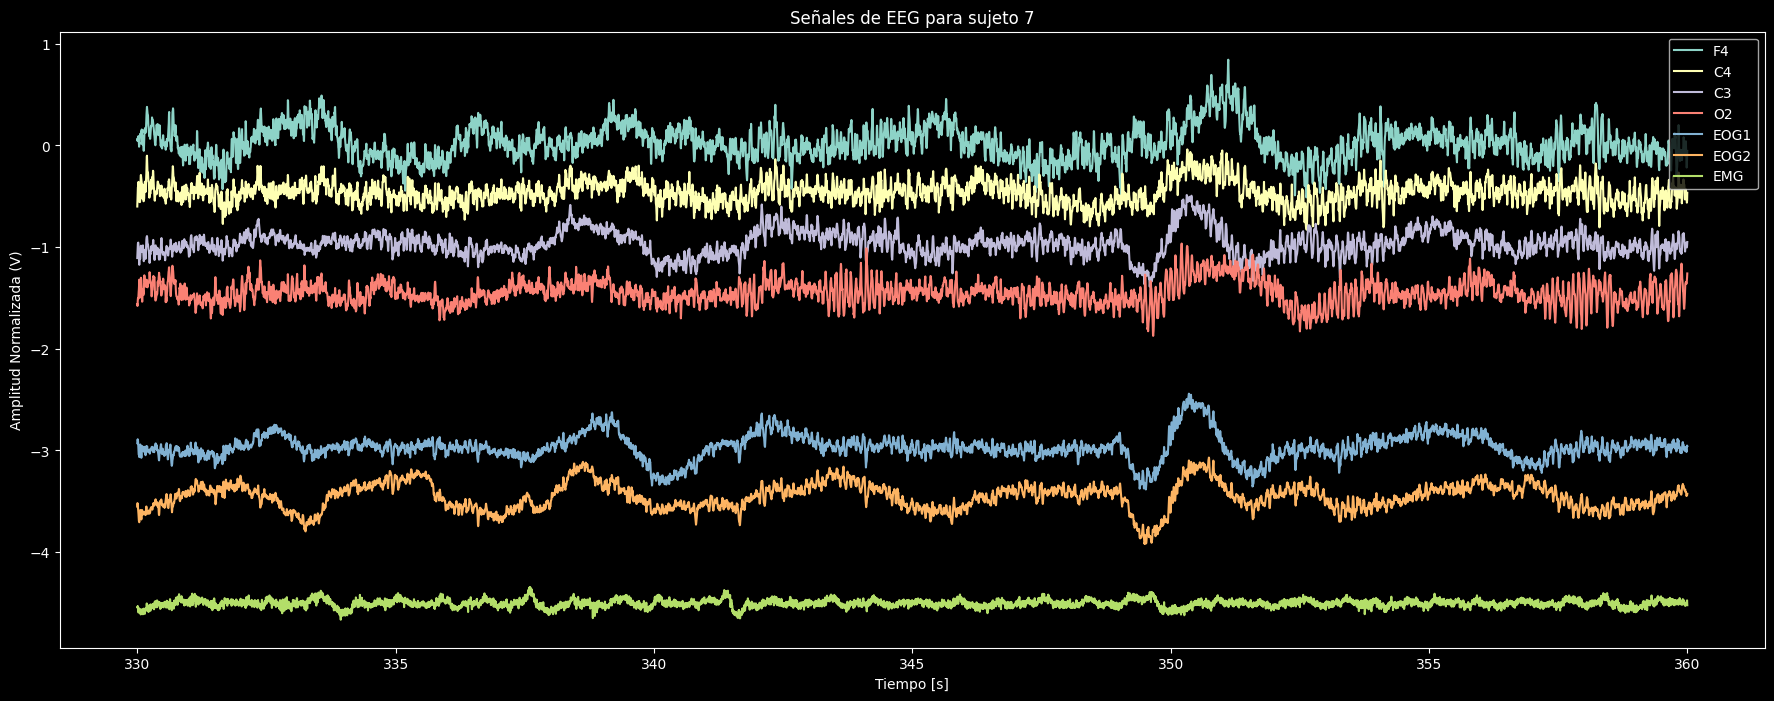

In [ ]:
ind_i=fs*330
ind_f=fs*360
print(t_S7[ind_i]/60)

plt.figure(figsize=(22,8))
plt.plot(t_S7[ind_i:ind_f],1000*F4_S7[ind_i:ind_f], label="F4")
plt.plot(t_S7[ind_i:ind_f],1000*C4_S7[ind_i:ind_f]-0.5, label="C4" )
plt.plot(t_S7[ind_i:ind_f],1000*C3_S7[ind_i:ind_f]-1, label="C3")
plt.plot(t_S7[ind_i:ind_f],1000*O2_S7[ind_i:ind_f]-1.5, label="O2")
plt.plot(t_S7[ind_i:ind_f],1000*EOG1_S7[ind_i:ind_f]-3, label="EOG1")
plt.plot(t_S7[ind_i:ind_f],1000*EOG2_S7[ind_i:ind_f]-3.5, label="EOG2")
plt.plot(t_S7[ind_i:ind_f],400*EMG_S7[ind_i:ind_f]-4.5, label="EMG")

plt.ylabel('Amplitud Normalizada (V)')
plt.xlabel('Tiempo [s]')
plt.title("Señales de EEG para sujeto 7")
plt.legend(loc='upper right')
plt.show()

In [ ]:
df_S7_norm = pd.DataFrame(channels_S7)
df_S7=Archivo_xls(df_S7_norm,hypnogram_txt_S7)

# Guardar el DataFrame como un archivo xls
xls_file_path = '/content/drive/MyDrive/ZAJ/PSB/TP Final PSB polisomnonografía/DB/SN007/SN007_sleepscoring_modified.xls'
df_S7.to_excel(xls_file_path, index=False, engine='openpyxl')

Columnas en el DataFrame antes de la limpieza: Index(['Date', ' Time', ' Recording onset', ' Duration', ' Annotation',
       ' Linked channel'],
      dtype='object')
Columnas en el DataFrame después de la limpieza: Index(['Date', 'Time', 'Recording onset', 'Duration', 'Annotation',
       'Linked channel'],
      dtype='object')
       Date           Time  Recording onset  Duration      Annotation  \
0  01.01.01       22.24.00             0.00        30   Sleep stage W   
1  01.01.01       22.24.30            30.00        30   Sleep stage W   
2  01.01.01   22.24.42.060            42.06         0      Lights off   
3  01.01.01       22.25.00            60.00        30   Sleep stage W   
4  01.01.01       22.25.30            90.00        30   Sleep stage W   

  Linked channel  
0                 
1                 
2           SaO2  
3                 
4                 
Se encontró una columna que contiene 'Annotation'
       Date           Time  Recording onset  Duration      Annot

Procedemos a confeccionar un **Hipnograma** del registro.

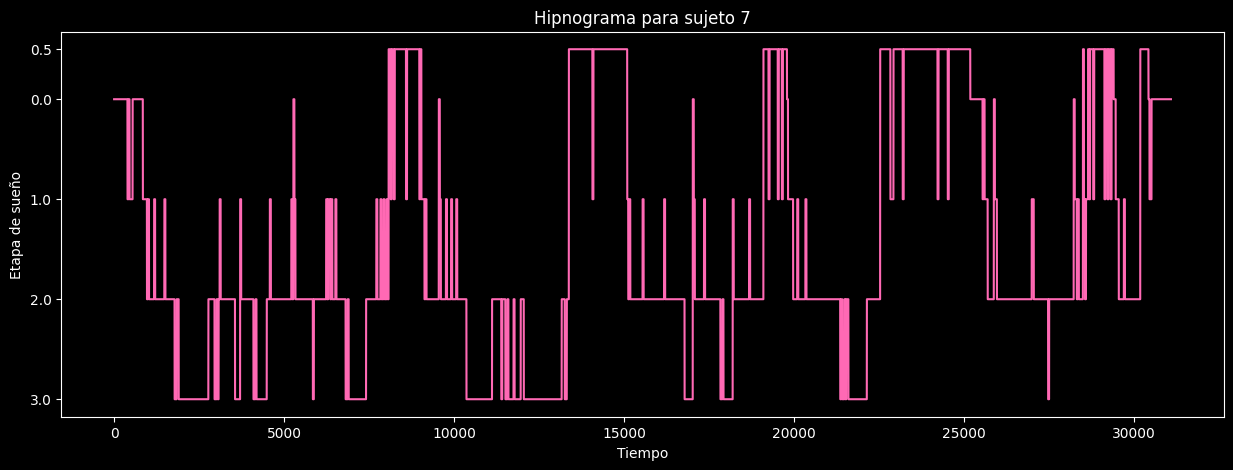

In [ ]:
fases_S7 = df_S7['Stage_Value'].tolist()
fases_hipno_S7=fases_S7[3:len(fases_S7)-1]

hipno_S7 = hipnograma(fases_hipno_S7)
t_hipno_S7=np.linspace(0, 30*len(fases_S7),len(hipno_S7))

plt.figure(figsize=(15, 5))
plt.plot(t_hipno_S7, hipno_S7, label='Hipnograma',color="hotpink")
plt.xlabel('Tiempo')
plt.ylabel('Etapa de sueño')
plt.title('Hipnograma para sujeto 7')

yticks = np.unique(hipno_S7)
yticks_labels = [-ytick if ytick not in [0, 0.5] else ytick for ytick in yticks]
plt.yticks(yticks, yticks_labels)

plt.show()

##Acondicionamiento

La información del Dataset aclara que las señales de EEG fueron filtradas con un PB de entre 1Hz y 35Hz. Otras bibliografías aclaran que se suele utilizar un PB de entre 0.16Hz y 35Hz. Por otra parte, no se aclara nada sobre las señales de EOG y EMG, que también son de interés para este trabajo. Se suelen utilizar PB de entre 0.2Hz y 10Hz para EOG y un PB de 10Hz a 90Hz para EMG. Para justificar sus implementaciones, utilizaremos la transformada de fourier y así visualizar otros ruidos posibles, tales como picos de ruido en 50Hz.

### Funciones

In [ ]:
def fourier(senal,titulo,plotting=True):

  canal_fft = fft(senal)
  L = canal_fft.shape[0]
  f = np.linspace(0,1,L) * fs
  y = 2.0/L * np.abs(canal_fft[0:int(L/2)])
  plt.figure(figsize = (15,7))
  plt.title(titulo)
  plt.plot(f[:int(L/2)],y,"orchid")
  plt.xlabel('Frecuencia [Hz]')
  plt.ylabel('Amplitud')
  plt.grid()
  plt.show()

In [ ]:
def pasabandas(Fs,eeg,time,f0,fi):

  N = 2**3
  wn = [f0,fi]
  sos = scipy.signal.butter(N, wn, btype = 'bandpass', output = 'sos', fs = fs)
  filtrada = scipy.signal.sosfiltfilt(sos, eeg)

  return filtrada

In [ ]:
def Notch(f_noise,fs,time,eeg):
  N = 5
  wn = [f_noise-0.25,f_noise+0.25]

  [b,a] = sig.butter(N, wn, btype = 'bandstop', fs = fs)

  filt_notch = sig.lfilter(b,a,eeg)
  return filt_notch

In [ ]:
def Filtros_Digitales(data,fs,t):
  F4_PB=pasabandas(fs,data[0],t,0.16,35)
  C4_PB=pasabandas(fs,data[1],t,0.16,35)
  C3_PB=pasabandas(fs,data[2],t,0.16,35)
  O2_PB=pasabandas(fs,data[3],t,0.16,35)
  EOG1_PB=pasabandas(fs,data[4],t,0.16,10)
  EOG2_PB=pasabandas(fs,data[5],t,0.16,10)
  EMG_PB=pasabandas(fs,data[6],t,10,90)

  C4_notch=Notch(50,fs,t,C4_PB)
  C3_notch=Notch(50,fs,t,C3_PB)
  F4_notch=Notch(50,fs,t,F4_PB)
  O2_notch=Notch(50,fs,t,O2_PB)
  EOG1_notch=Notch(50,fs,t,EOG1_PB)
  EOG2_notch=Notch(50,fs,t,EOG2_PB)


  return F4_notch,C4_notch,C3_notch,O2_notch,EOG1_notch,EOG2_notch,EMG_PB

### SN007

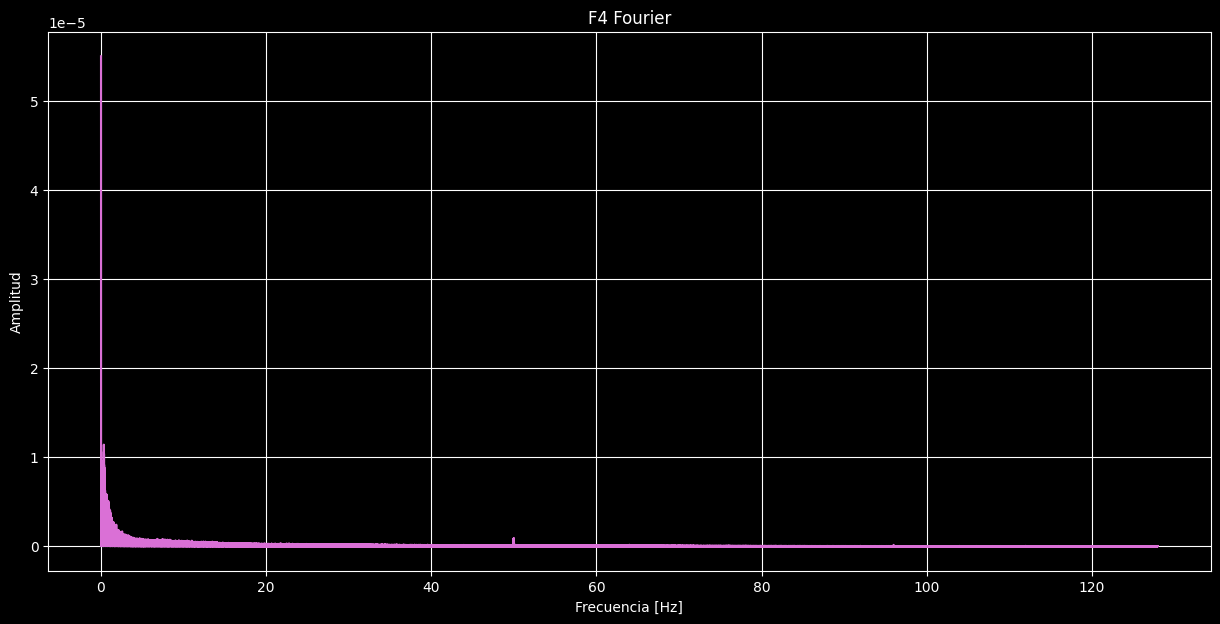

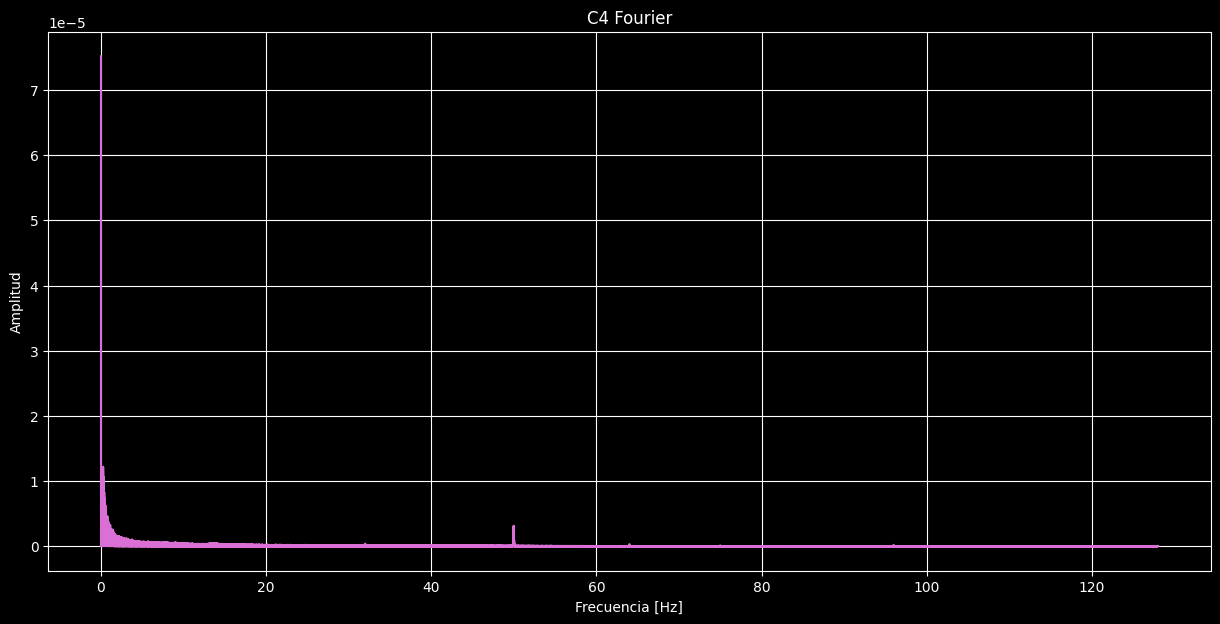

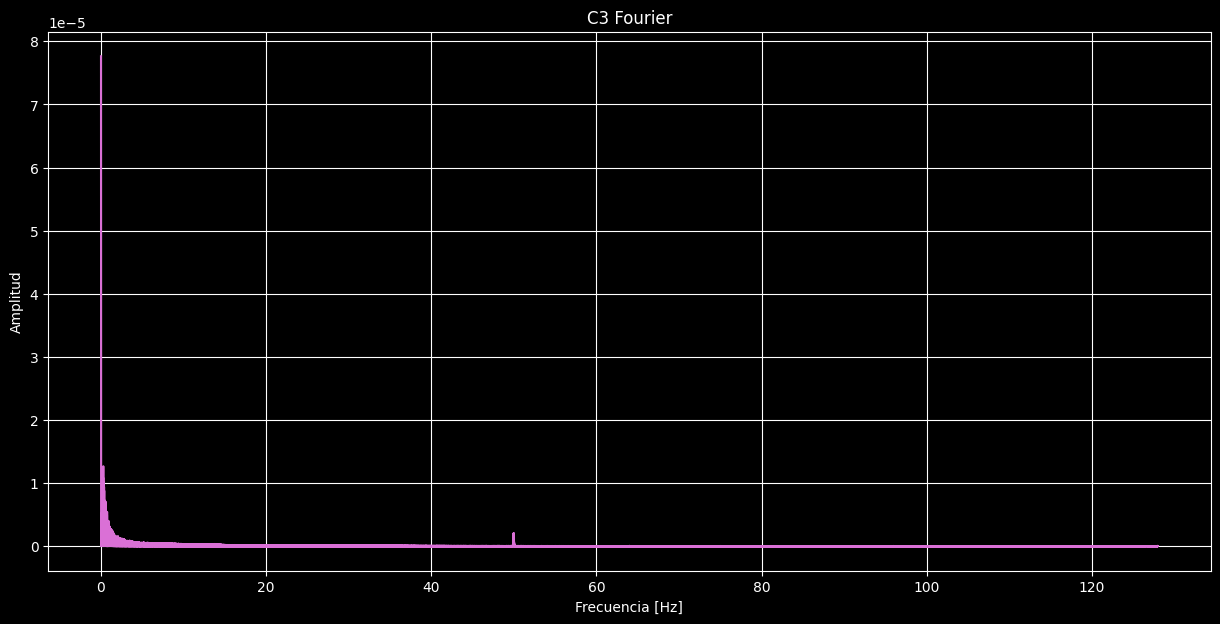

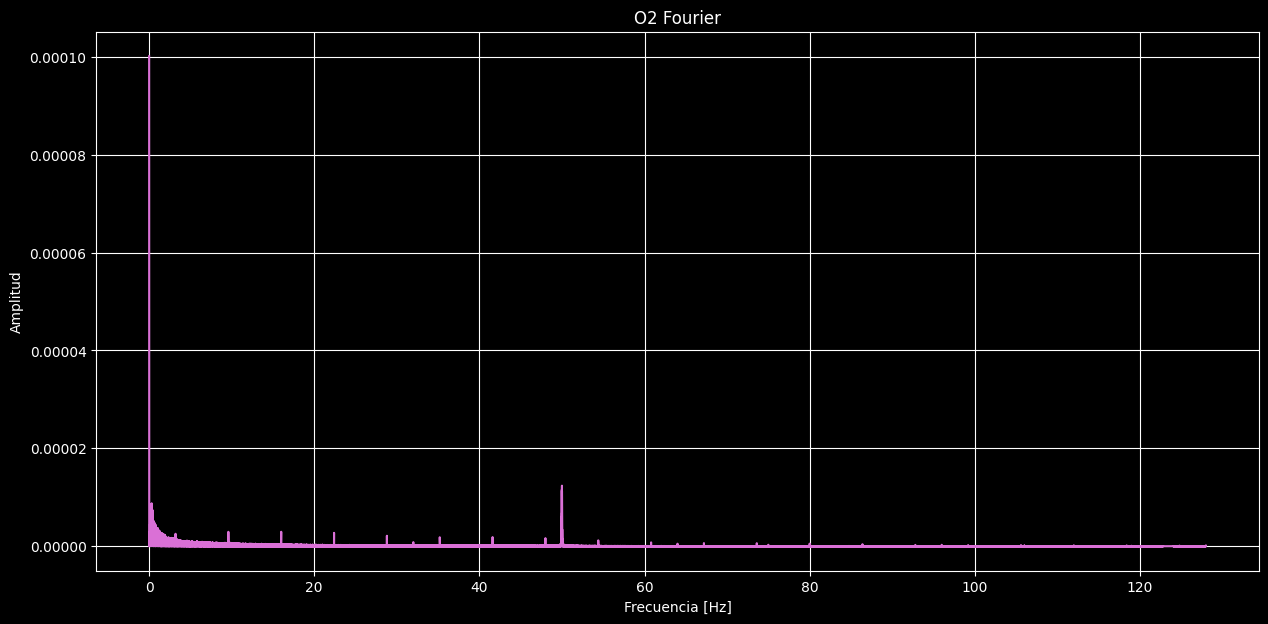

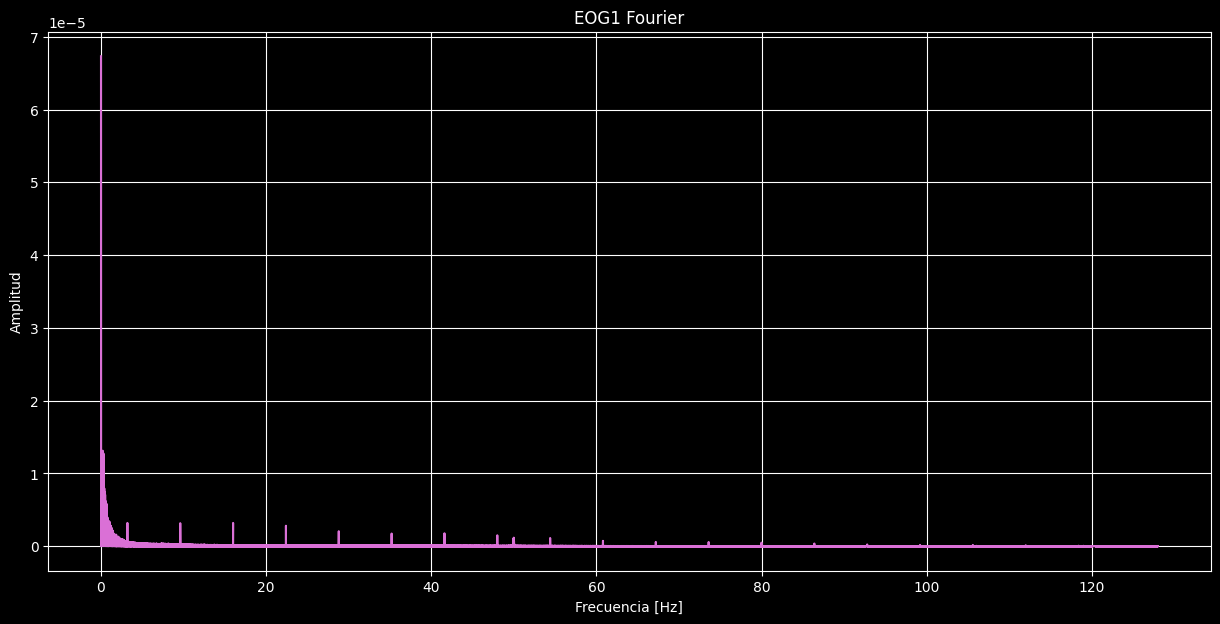

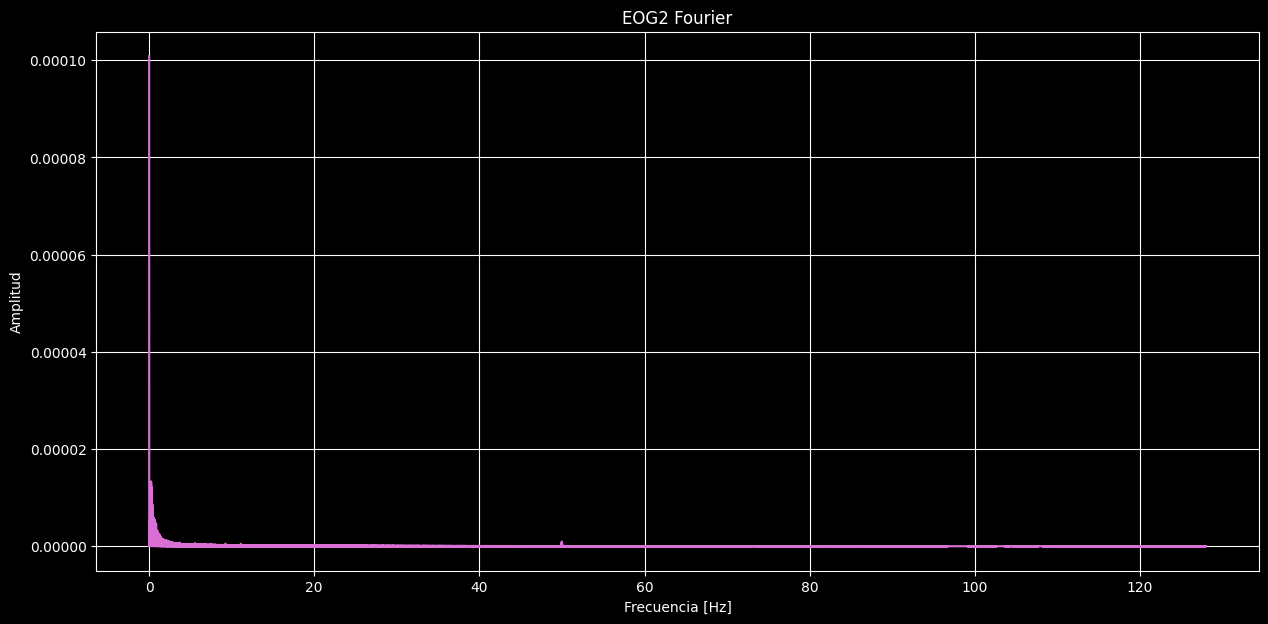

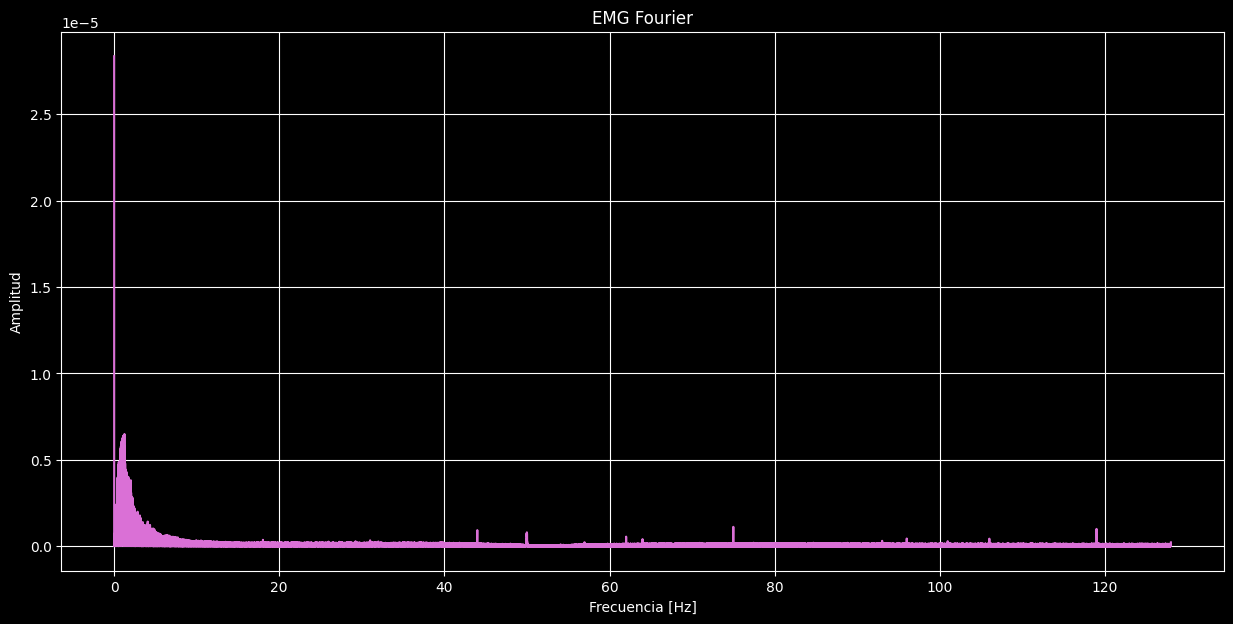

In [ ]:
titulo1="F4 Fourier"
fourier(F4_S7,titulo1)
titulo2="C4 Fourier"
fourier(C4_S7,titulo2)
titulo3="C3 Fourier"
fourier(C3_S7,titulo3)
titulo4="O2 Fourier"
fourier(O2_S7,titulo4)
titulo5="EOG1 Fourier"
fourier(EOG1_S7, titulo5)
titulo6="EOG2 Fourier"
fourier(EOG2_S7, titulo6)
titulo7="EMG Fourier"
fourier(EMG_S7, titulo7)

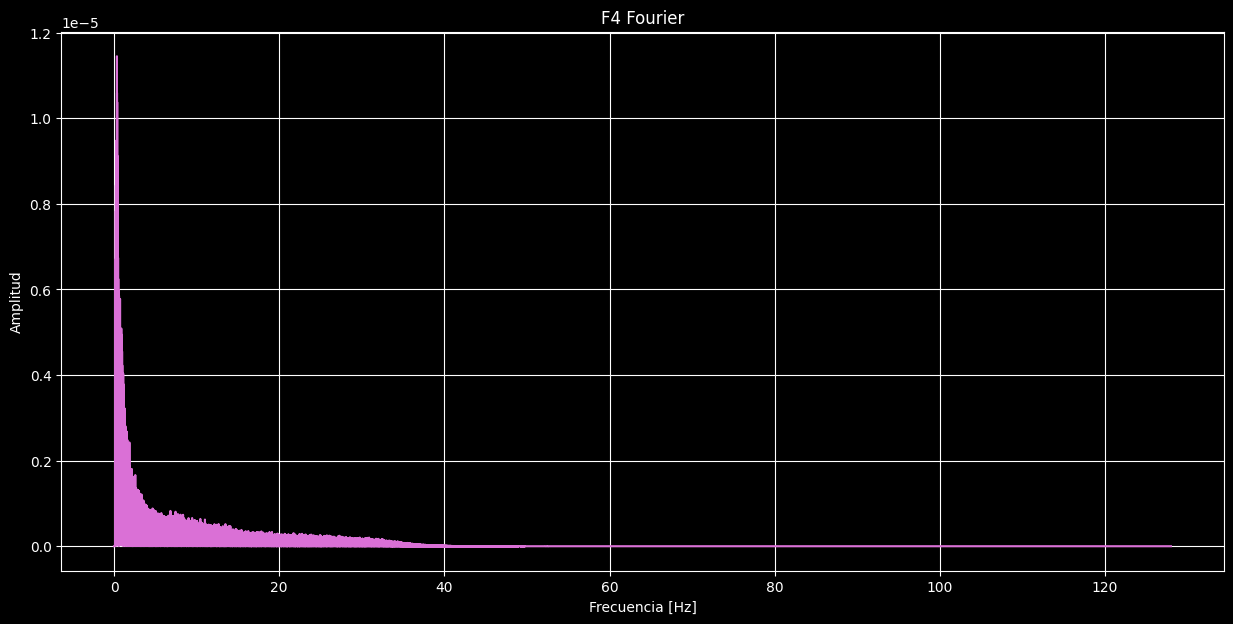

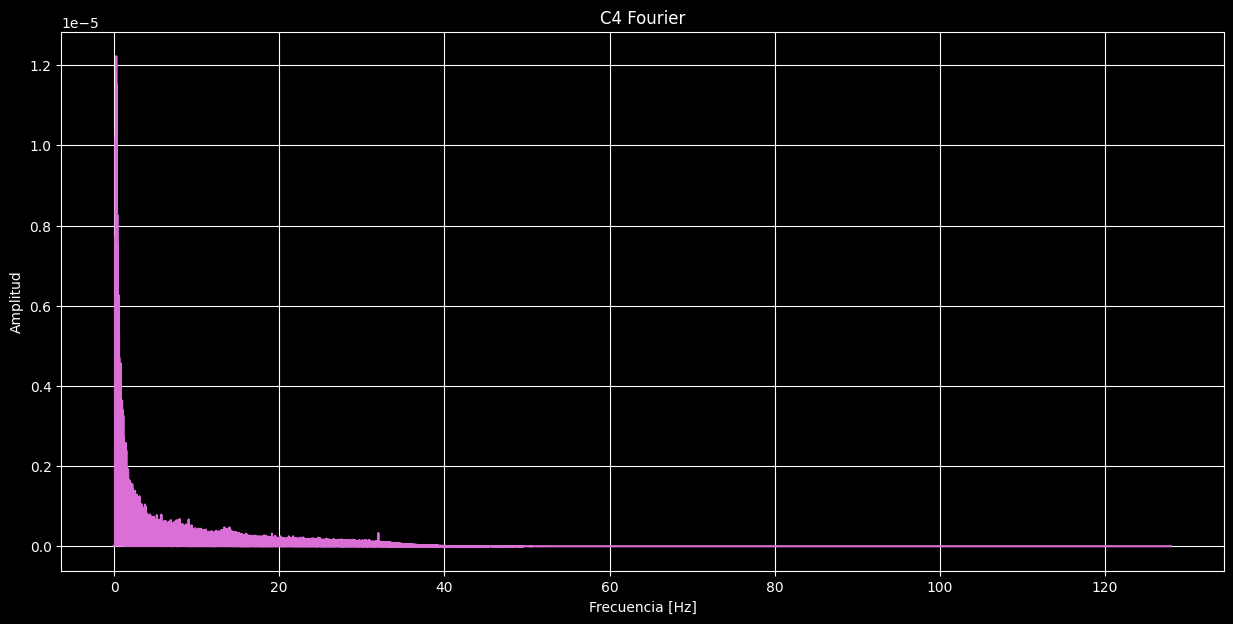

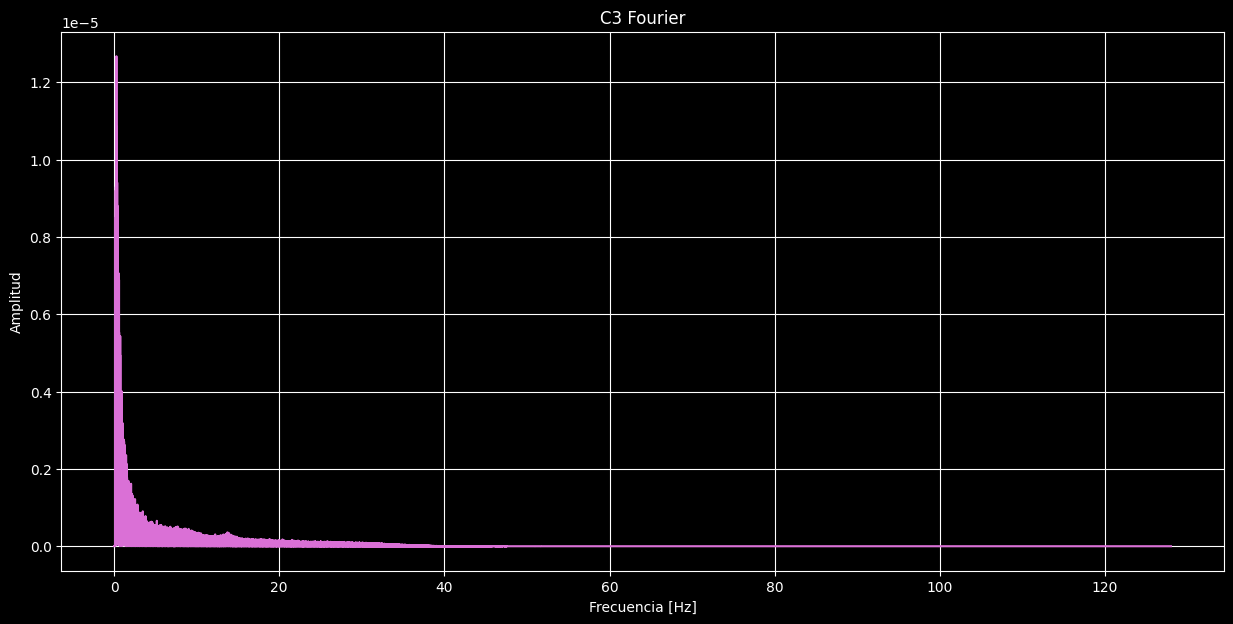

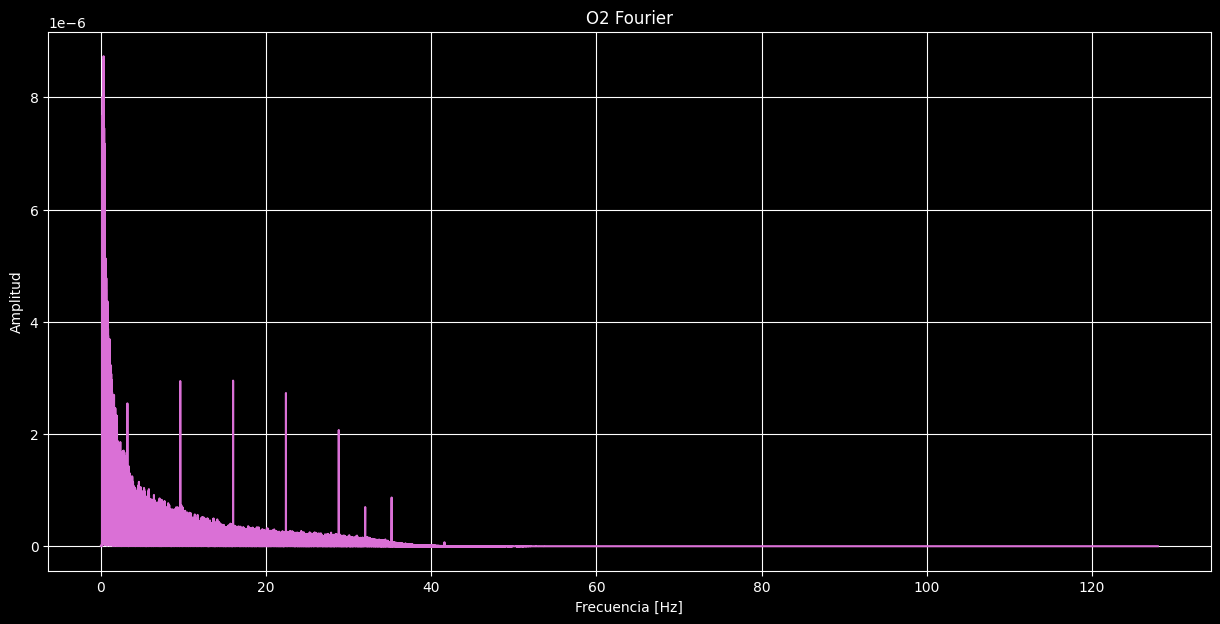

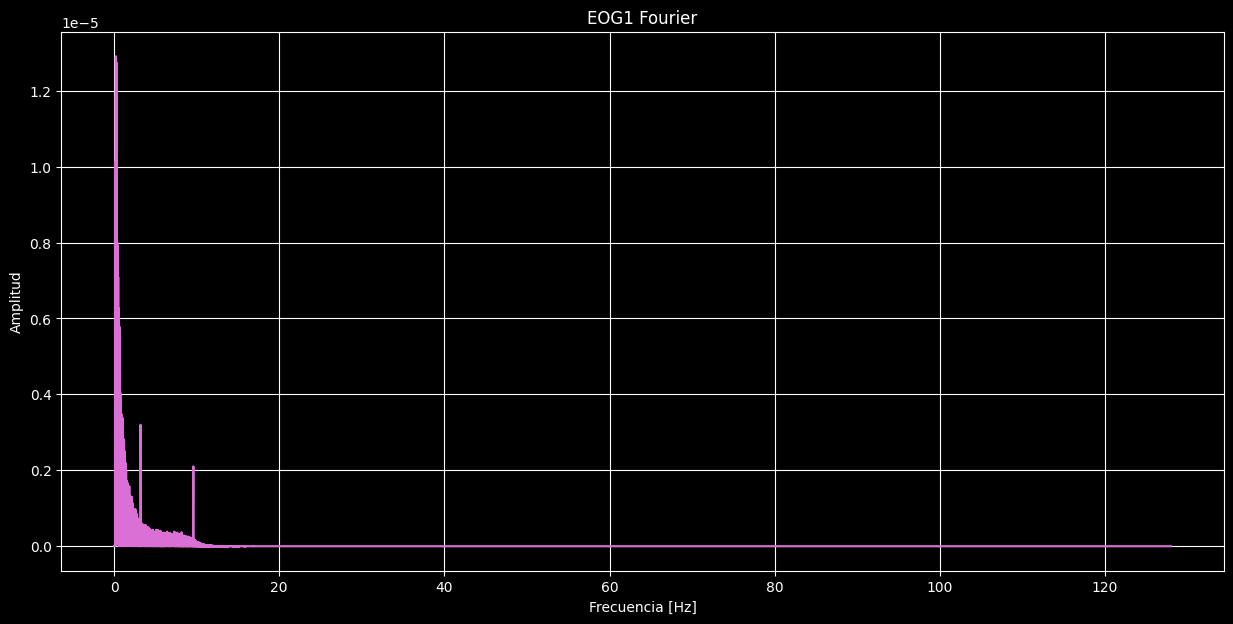

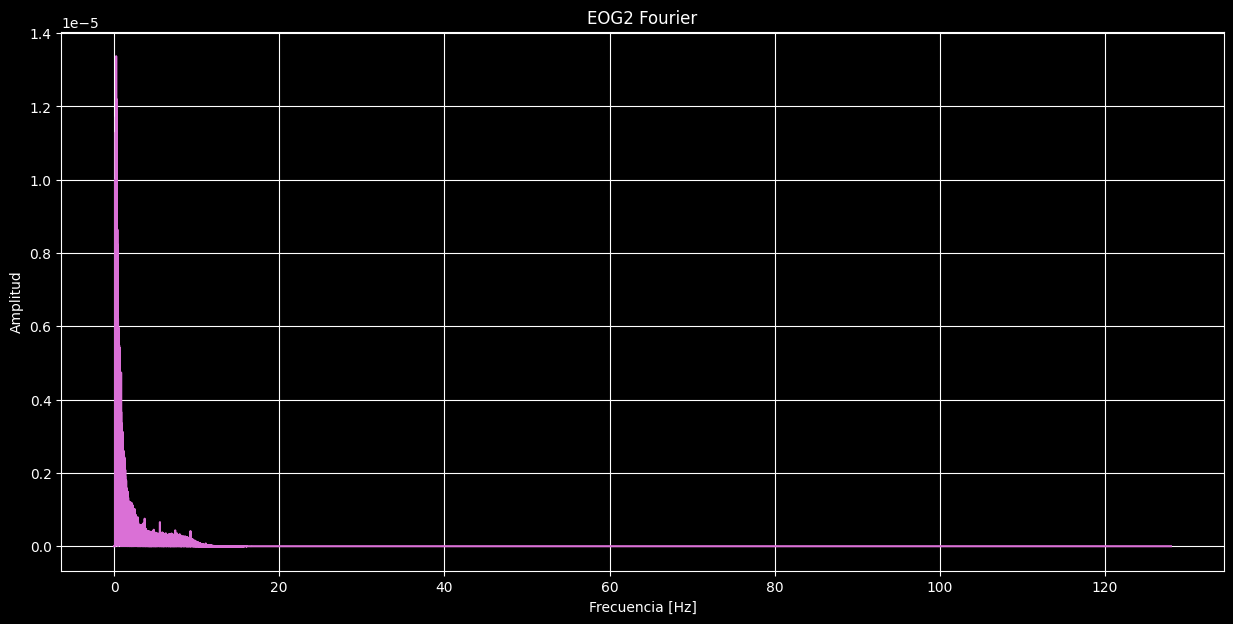

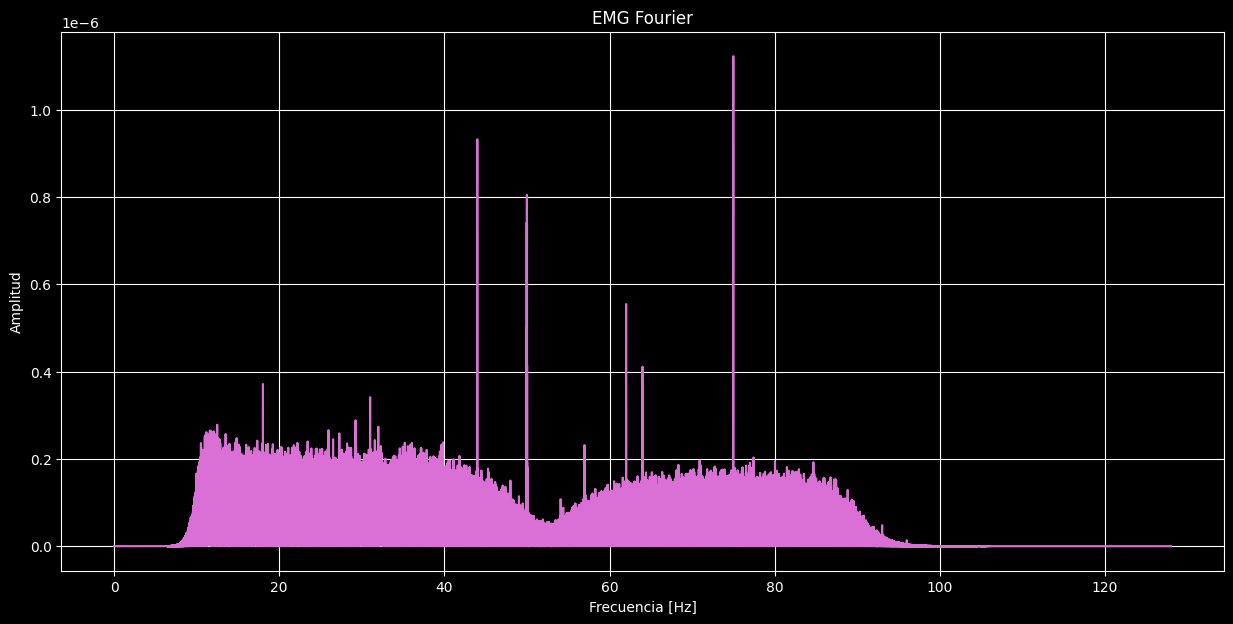

In [ ]:
F4_notch_S7,C4_notch_S7,C3_notch_S7,O2_notch_S7,EOG1_notch_S7,EOG2_notch_S7,EMG_PB_S7=Filtros_Digitales([F4_S7,C4_S7,C3_S7,O2_S7,EOG1_S7,EOG2_S7,EMG_S7],fs,t_S7)

titulo1="F4 Fourier"
fourier(F4_notch_S7,titulo1)
titulo2="C4 Fourier"
fourier(C4_notch_S7,titulo2)
titulo3="C3 Fourier"
fourier(C3_notch_S7,titulo3)
titulo4="O2 Fourier"
fourier(O2_notch_S7,titulo4)
titulo5="EOG1 Fourier"
fourier(EOG1_notch_S7, titulo5)
titulo6="EOG2 Fourier"
fourier(EOG2_notch_S7, titulo6)
titulo7="EMG Fourier"
fourier(EMG_PB_S7, titulo7)


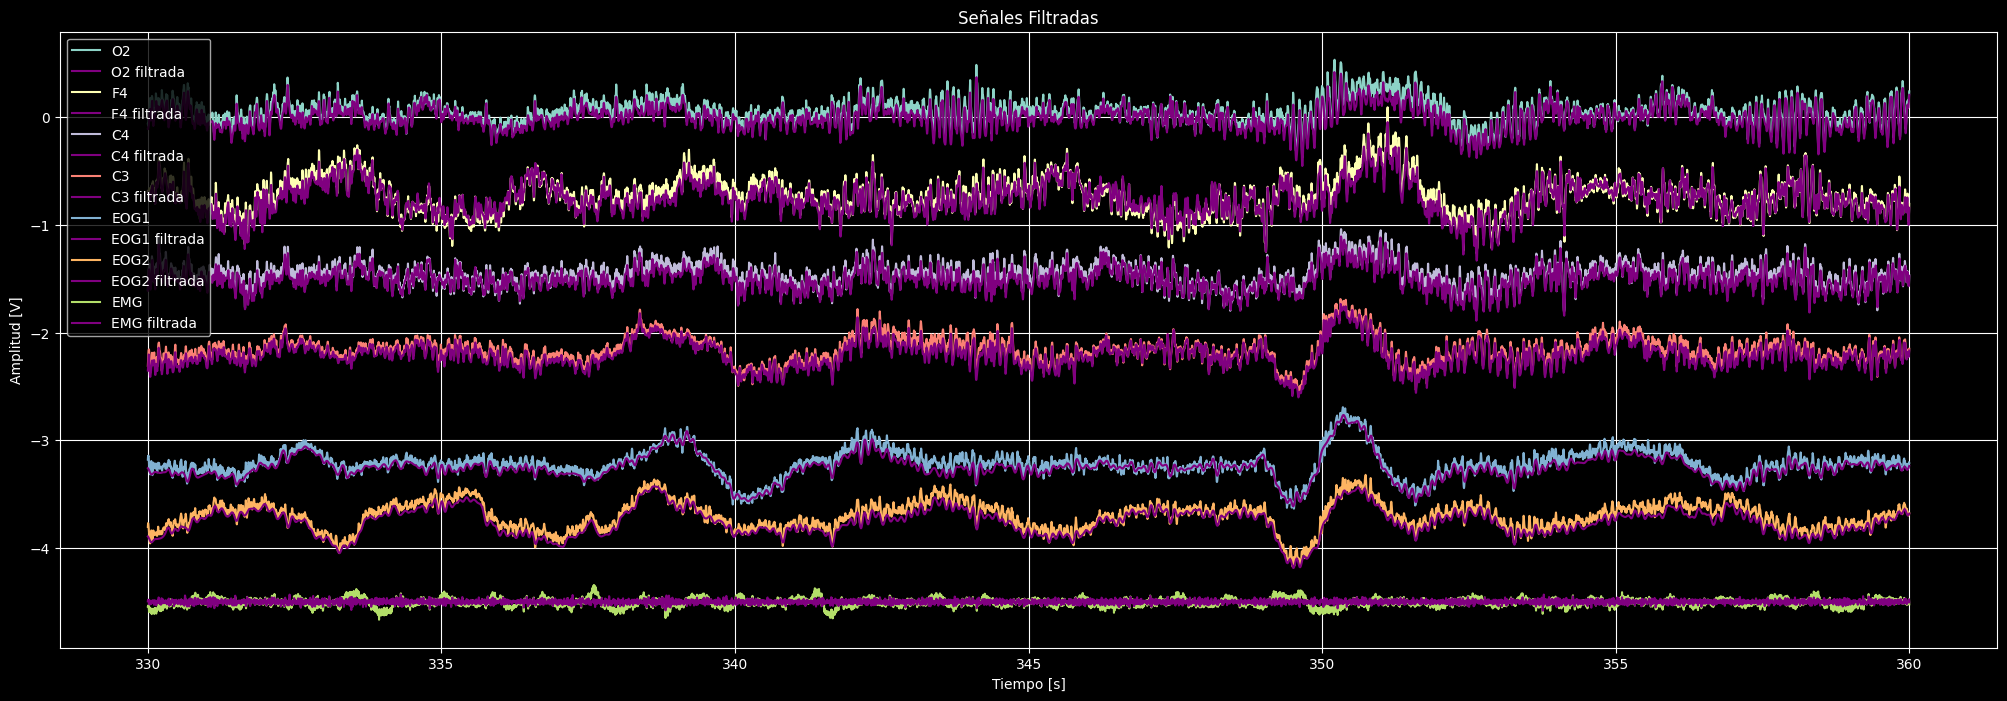

In [ ]:
ind_i=fs*330
ind_f=fs*360

plt.figure(figsize=(25,8))

plt.plot(t_S7[ind_i:ind_f],1000*O2_S7[ind_i:ind_f], label='O2')
plt.plot(t_S7[ind_i:ind_f],1000*O2_notch_S7[ind_i:ind_f], label='O2 filtrada', color='purple')

plt.plot(t_S7[ind_i:ind_f],1000*F4_S7[ind_i:ind_f]-0.75,label='F4')
plt.plot(t_S7[ind_i:ind_f],1000*F4_notch_S7[ind_i:ind_f]-0.75,label='F4 filtrada', color='purple')

plt.plot(t_S7[ind_i:ind_f],1000*C4_S7[ind_i:ind_f]-1.5,label='C4')
plt.plot(t_S7[ind_i:ind_f],1000*C4_notch_S7[ind_i:ind_f]-1.5,label='C4 filtrada', color='purple')

plt.plot(t_S7[ind_i:ind_f],1000*C3_S7[ind_i:ind_f]-2.2,label='C3')
plt.plot(t_S7[ind_i:ind_f],1000*C3_notch_S7[ind_i:ind_f]-2.2,label='C3 filtrada', color='purple')

plt.plot(t_S7[ind_i:ind_f],1000*EOG1_S7[ind_i:ind_f]-3.25, label='EOG1')
plt.plot(t_S7[ind_i:ind_f],1000*EOG1_notch_S7[ind_i:ind_f]-3.25, label='EOG1 filtrada', color='purple')

plt.plot(t_S7[ind_i:ind_f],1000*EOG2_S7[ind_i:ind_f]-3.75,label='EOG2')
plt.plot(t_S7[ind_i:ind_f],1000*EOG2_notch_S7[ind_i:ind_f]-3.75,label='EOG2 filtrada', color='purple')

plt.plot(t_S7[ind_i:ind_f],400*EMG_S7[ind_i:ind_f]-4.5, label='EMG')
plt.plot(t_S7[ind_i:ind_f],400*EMG_PB_S7[ind_i:ind_f]-4.5,label='EMG filtrada', color='purple')


plt.title('Señales Filtradas')
plt.ylabel('Amplitud [V]')
plt.xlabel('Tiempo [s]')
plt.legend()
plt.grid()
plt.show()

##ICA

Las señales de EEG comunmente se encuentran contaminadas por artefactos que no logran eliminarse por medio de la utilización de filtros convencionales. Un artefacto típico es la presencia de EOG en las señales de EEG.

Una técnica habitual utilizada para remover estos artefactos es la de Independent Component Analysis (ICA).
Si se entiende a una señal de EEG tomada por distintos electrodos colocados en diferentes secciones de la cabeza como la combinación de varias señales independientes, puede descompornerse mediante este algoritmo y a partir de allí, evaluar cuál tiene origen ocular. Si esto se realiza correctamente, la señal de EEG puede ser reconstruida correctamente sin intervención de artefacto ocular (Kaczorowska et al.,2017).

### Funciones

In [ ]:
def diccionarios_ICA(data_filt):
  F4_filt=data_filt[0].copy()
  C4_filt=data_filt[1].copy()
  C3_filt=data_filt[2].copy()
  O2_filt=data_filt[3].copy()
  EOG1_filt=data_filt[4].copy()
  EOG2_filt=data_filt[5].copy()
  canales_nombres_dict={'F4':F4_filt,'C4':C4_filt,'C3':C3_filt,'O2': O2_filt,'EOG1': EOG1_filt,'EOG2' : EOG2_filt}
  canales= [F4_filt,C4_filt,C3_filt,O2_filt,EOG1_filt,EOG2_filt]
  return canales_nombres_dict, canales

In [ ]:
def ICA(raw):
  ica= mne.preprocessing.ICA(n_components=4,random_state=0,verbose=False)
  ica.fit(raw)
  sources = ica.get_sources(raw).get_data()
  return sources,ica

In [ ]:
def pearson_coef(sources,info, raw):

  eog1_signal = raw._data[info['ch_names'].index('EOG1')]
  eog2_signal = raw._data[info['ch_names'].index('EOG2')]

  # Calcula el coeficiente de correlación de Pearson entre EOG1 y c/u de las componentes
  correlations_eog1 = [pearsonr(eog1_signal, source)[0] for source in sources]

  # Calcular coeficiente de correlación de Pearson entre EOG2 y c/u de las componentes
  correlations_eog2 = [pearsonr(eog2_signal, source)[0] for source in sources]

  print("Coeficientes de correlación de Pearson entre EOG1 y cada componente independiente:")
  for i, corr in enumerate(correlations_eog1):
      print(f"Componente {i+1}: {corr:.4f}")

  print("\nCoeficientes de correlación de Pearson entre EOG2 y cada componente independiente:")
  for i, corr in enumerate(correlations_eog2):
      print(f"Componente {i+1}: {corr:.4f}")

  sources_conEOG = np.concatenate((sources, [eog1_signal, eog2_signal]), axis=0)
  return sources_conEOG


### SN007

In [ ]:
Señales_filtradas_S7=[F4_notch_S7,C4_notch_S7,C3_notch_S7,O2_notch_S7,EOG1_notch_S7,EOG2_notch_S7]
canales_nombres_S7_dict, canales_S7=diccionarios_ICA(Señales_filtradas_S7)
ch_types = ['eeg','eeg','eeg','eeg','eog','eog']

In [ ]:
canales_nombres_S7 = list(canales_nombres_S7_dict.keys())
canales_señales_S7 = np.array([np.array(signal) for signal in canales_S7])

info_S7_ICA = mne.create_info(ch_names=canales_nombres_S7, sfreq=fs, ch_types=ch_types)
raw_S7_ICA = mne.io.RawArray(canales_señales_S7, info_S7_ICA)

Creating RawArray with float64 data, n_channels=6, n_times=7905792
    Range : 0 ... 7905791 =      0.000 ... 30881.996 secs
Ready.


In [ ]:
sources_S7_ICA,ica_S7=ICA(raw_S7_ICA)

Fitting ICA to data using 4 channels (please be patient, this may take a while)


<ipython-input-28-f60449b8b808>:3: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw)


Selecting by number: 4 components
Fitting ICA took 43.6s.


Una vez obtenidas las componentes independientes, vamos a evaluar cuál es la componente que más se asemeje a una señal de EOG. Para esto vamos a calcular el coeficiente de Pearson entre cada una de las componentes obtenidas con respecto a EOG1 y EOG2.

Coeficientes de correlación de Pearson entre EOG1 y cada componente independiente:
Componente 1: 0.2663
Componente 2: -0.0618
Componente 3: -0.6743
Componente 4: -0.1023

Coeficientes de correlación de Pearson entre EOG2 y cada componente independiente:
Componente 1: 0.3867
Componente 2: -0.0278
Componente 3: -0.5285
Componente 4: -0.2798


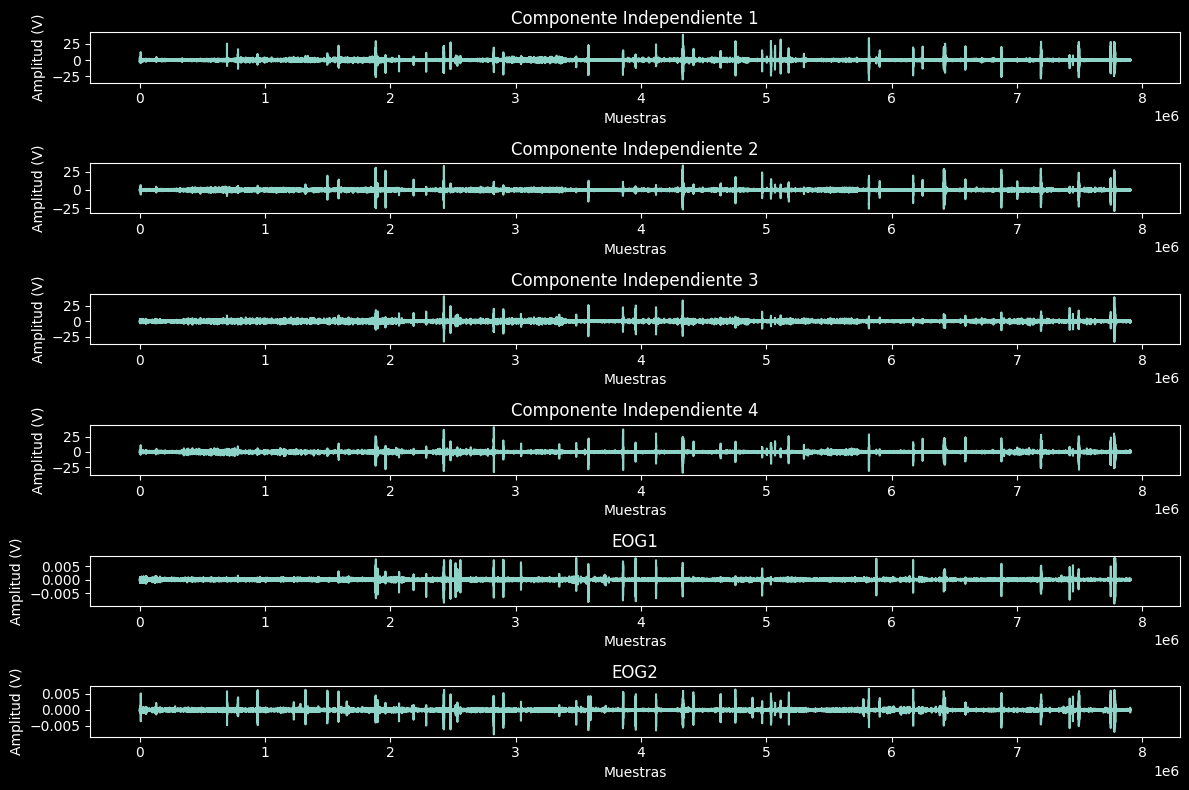

In [ ]:
sources_conEOG_S7 = pearson_coef(sources_S7_ICA,info_S7_ICA,raw_S7_ICA)

plt.figure(figsize=(12, 8))
num_plots = sources_conEOG_S7.shape[0]
for i in range(num_plots):
    plt.subplot(num_plots, 1, i+1)
    plt.plot(sources_conEOG_S7[i])
    if i < len(sources_conEOG_S7)-2:
        plt.title(f'Componente Independiente {i+1}')
    elif i == len(sources_conEOG_S7)-2:
        plt.title('EOG1')
    else:
      plt.title('EOG2')

    plt.xlabel('Muestras')
    plt.ylabel('Amplitud (V)')
plt.tight_layout()
plt.show()

Tomando de referencia los coeficientes obtenidos, vamos a considerar eliminar la componente cuyo coeficiente tenga un módulo lo más cercano a 1. En este caso, resulta ser para la componente 3. Procedemos a graficar la componente 3 junto con cada uno de los EOG.

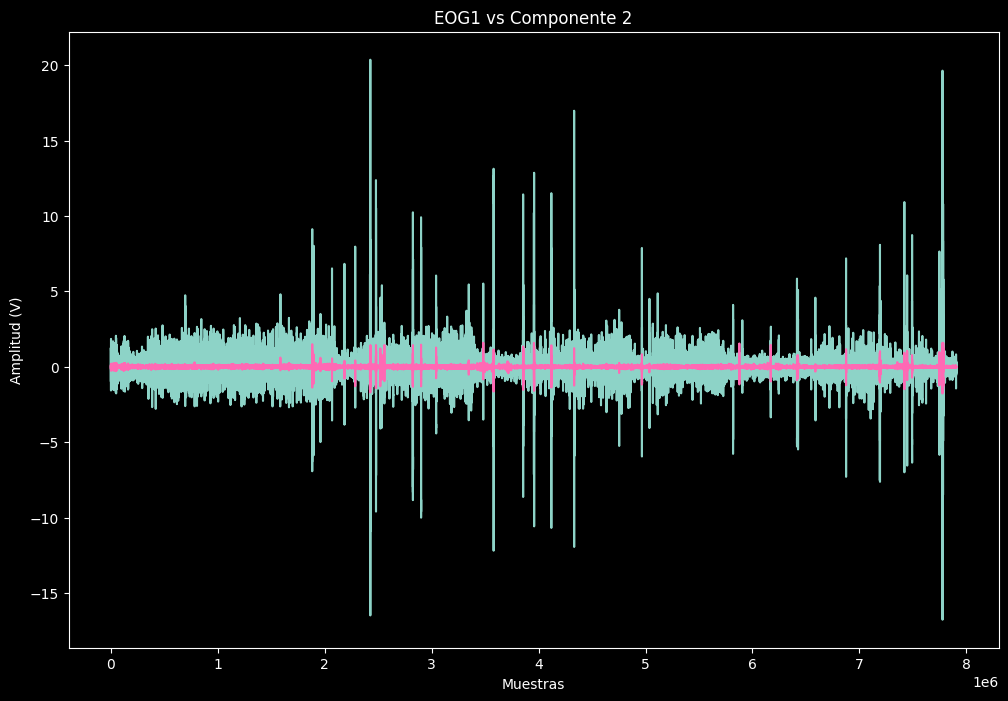

In [ ]:
plt.figure(figsize=(12, 8))
num_plots = sources_conEOG_S7.shape[0]

plt.plot(0.5*sources_conEOG_S7[2])
plt.plot(200*EOG1_notch_S7, color="hotpink")
plt.title('EOG1 vs Componente 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (V)')

plt.show()

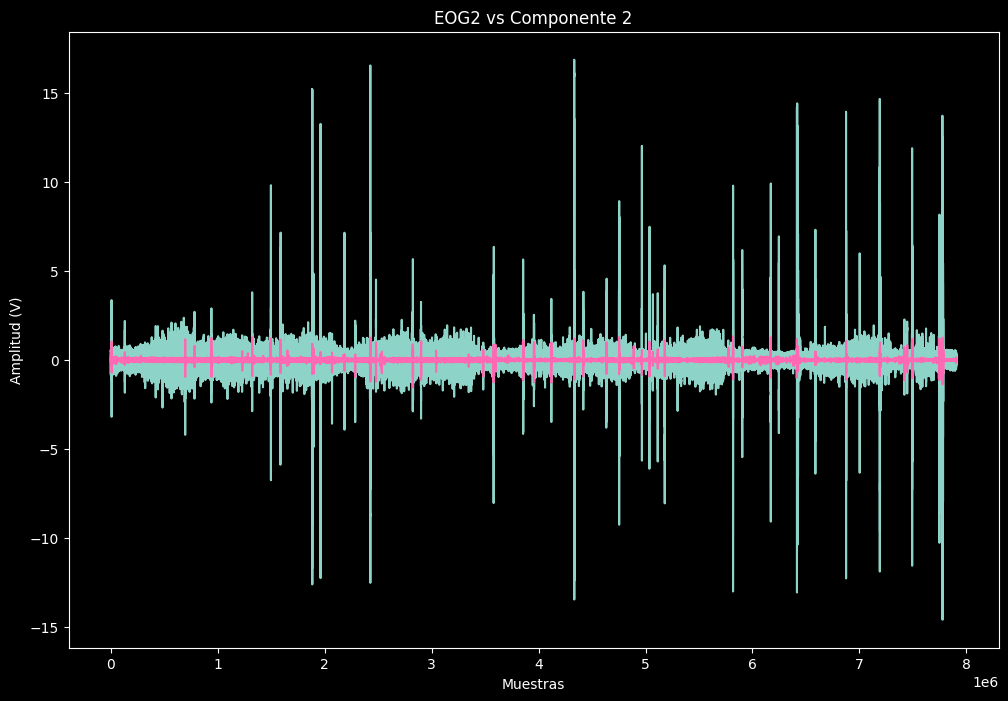

In [ ]:
plt.figure(figsize=(12, 8))
num_plots = sources_conEOG_S7.shape[0]

plt.plot(0.5*sources_conEOG_S7[1])
plt.plot(200*EOG2_notch_S7, color="hotpink")
plt.title('EOG2 vs Componente 2')
plt.xlabel('Muestras')
plt.ylabel('Amplitud (V)')

plt.show()

In [ ]:
ica_S7.exclude=[2]
señales_reconstruidas_S7=raw_S7_ICA.copy()
ica_S7.apply(señales_reconstruidas_S7)

Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 1 ICA component
    Projecting back using 4 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"4 EEG, 2 EOG"
Bad channels,None
EOG channels,"EOG1, EOG2"
ECG channels,Not available
Sampling frequency,256.00 Hz
Highpass,0.00 Hz
Lowpass,128.00 Hz


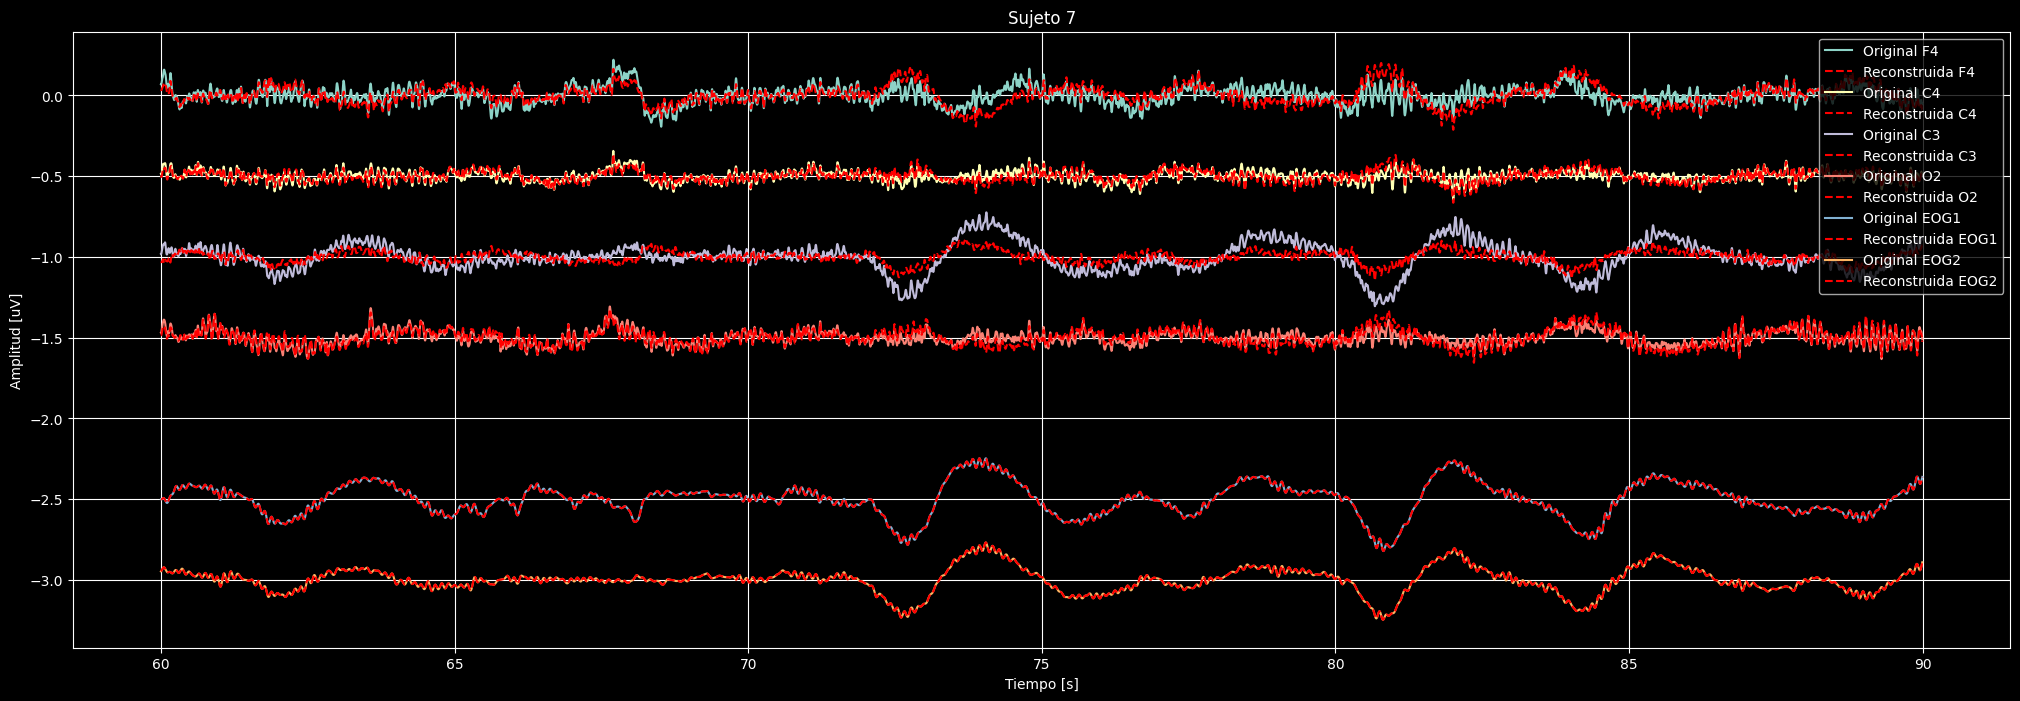

In [ ]:
plt.figure(figsize=(25, 8))

ind_i=fs*60
ind_f=fs*90
desplazamientos = [0, -0.5, -1, -1.5, -2.5, -3]

for i, (ch_name, desplazamiento) in enumerate(zip(canales_nombres_S7, desplazamientos)):
    plt.plot(t_S7[ind_i:ind_f], raw_S7_ICA.get_data()[i, ind_i:ind_f] * 300 + desplazamiento, label=f'Original {ch_name}',)
    plt.plot(t_S7[ind_i:ind_f], señales_reconstruidas_S7.get_data()[i, ind_i:ind_f] * 300 + desplazamiento, label=f'Reconstruida {ch_name}', linestyle='--', color='red')


plt.ylabel('Amplitud [uV]')
plt.xlabel('Tiempo [s]')
plt.title("Sujeto 7")
plt.legend(loc='upper right')
plt.grid()
plt.show()

Podemos ver que luego de eliminar la componente 3, el canal C3 fue uno de los más acondicionados. Evidentemente, C3 era un canal que resultaba estar muy contaminado por los artefactos de EOG.

Al asegurarnos que fue correctamente filtrado, procedemos a utilizarlo para llevar a cabo los modelos.

##Modelos

Para realizar los modelos, necesitamos dividir las señales en épocas de 30 segs, ya que el scoring de sueño se realiza por épocas. Nos interesa únicamente trabajar con sueño NREM, haciendo un foco en su utilidad para estudios de polisomonografía para siestas cortas. Por lo cual removeremos todas las fases con puntuación 0.5 correspondiente a REM, como fue denotado anteriormente.

###Fragmentación

#### Funciones

In [ ]:
def fragmentar(EEG,fs):
    longitud_ventana=30
    longitud_ventana_muestras=longitud_ventana*fs

    cant_segmentos=len(EEG)//longitud_ventana_muestras

    segmentos=[]
    for i in range(cant_segmentos):
        segmento = EEG[i*longitud_ventana_muestras:(i+1)*longitud_ventana_muestras]
        segmentos.append(segmento)

    return segmentos

In [ ]:
def eliminar_epocas(EEG,indices):
  EEG_copia=EEG.copy()
  indices.sort(reverse=True)
  for i in indices:
    EEG_copia.pop(i)
  return EEG_copia

In [ ]:
def encontrar_epocas_REM(fases_hipno):
  indices_REM=[]
  for i in range(len(fases_hipno)):
    if fases_hipno[i]==0.5:
      indices_REM+=[i]
  return indices_REM

In [ ]:
def epocas_segun_Fase(scoring_NREM,fase_tipo):
  indices_Fase=[]
  for i in range(len(scoring_NREM)):
    if scoring_NREM[i]==fase_tipo:
      indices_Fase+=[i]
  return indices_Fase

In [ ]:
def scoring_NREM(fases_hipno):
  scoring_NREM=[]
  for i in range(len(fases_hipno)):
    if fases_hipno[i]!=0.5:
      scoring_NREM+=[fases_hipno[i]]
  return scoring_NREM

#### SN007

In [ ]:
señales_ICA_data_S7=señales_reconstruidas_S7.get_data()

In [ ]:
reconstructed_signals_S7 = {
    'F4': señales_ICA_data_S7[canales_nombres_S7.index('F4')],
    'C4': señales_ICA_data_S7[canales_nombres_S7.index('C4')],
    'O2': señales_ICA_data_S7[canales_nombres_S7.index('O2')],
    'C3': señales_ICA_data_S7[canales_nombres_S7.index('C3')],
    'EOG1': señales_ICA_data_S7[canales_nombres_S7.index('EOG1')],
    'EOG2': señales_ICA_data_S7[canales_nombres_S7.index('EOG2')]
}

In [ ]:
F4_ICA_S7=reconstructed_signals_S7['F4']
C4_ICA_S7=reconstructed_signals_S7['C4']
O2_ICA_S7=reconstructed_signals_S7['O2']
C3_ICA_S7=reconstructed_signals_S7['C3']
EOG1_ICA_S7=reconstructed_signals_S7['EOG1']
EOG2_ICA_S7=reconstructed_signals_S7['EOG2']

In [ ]:
F4_epocas_S7=fragmentar(F4_ICA_S7,fs)
print("Primer ventana de F4:", F4_epocas_S7[0])
print("Longitud en tiempo:", len(F4_epocas_S7[0])//fs, "seg")

C4_epocas_S7=fragmentar(C4_ICA_S7,fs)
print("Primer ventana de C4:", C4_epocas_S7[0])
print("Longitud en tiempo:", len(C4_epocas_S7[0])//fs, "seg")

C3_epocas_S7=fragmentar(C3_ICA_S7,fs)
print("Primer ventana de C3:", C3_epocas_S7[0])
print("Longitud en tiempo:", len(C3_epocas_S7[0])//fs, "seg")

O2_epocas_S7=fragmentar(O2_ICA_S7,fs)
print("Primer ventana de O2:", O2_epocas_S7[0])
print("Longitud en tiempo:", len(O2_epocas_S7[0])//fs, "seg")

EOG1_epocas_S7=fragmentar(EOG1_ICA_S7,fs)
print("Primer ventana de EOG1:", EOG1_epocas_S7[0])
print("Longitud en tiempo:", len(EOG1_epocas_S7[0])//fs, "seg")

EOG2_epocas_S7=fragmentar(EOG2_ICA_S7,fs)
print("Primer ventana de EOG2:", EOG2_epocas_S7[0])
print("Longitud en tiempo:", len(EOG2_epocas_S7[0])//fs, "seg")

EMG_epocas_S7=fragmentar(EMG_PB_S7,fs)
print("Primer ventana de EMG:", EMG_epocas_S7[0])
print("Longitud en tiempo:", len(EMG_epocas_S7[0])//fs, "seg")

Primer ventana de F4: [0.00053664 0.00051441 0.00052084 ... 0.0002858  0.00024325 0.00021428]
Longitud en tiempo: 30 seg
Primer ventana de C4: [0.00044235 0.00040896 0.00039377 ... 0.00044929 0.00039489 0.00035158]
Longitud en tiempo: 30 seg
Primer ventana de C3: [-1.51510836e-04 -1.56160449e-04 -1.71925027e-04 ...  7.55074652e-05
  6.84445511e-05  5.92440874e-05]
Longitud en tiempo: 30 seg
Primer ventana de O2: [0.00055371 0.00052727 0.00052215 ... 0.00033517 0.00032573 0.00031667]
Longitud en tiempo: 30 seg
Primer ventana de EOG1: [ 0.0001372   0.00014641  0.00016156 ... -0.00028493 -0.00030394
 -0.00031855]
Longitud en tiempo: 30 seg
Primer ventana de EOG2: [-0.00021368 -0.00021176 -0.0002191  ...  0.00172362  0.00162823
  0.00153542]
Longitud en tiempo: 30 seg
Primer ventana de EMG: [1.61625743e-06 3.00809159e-04 1.48711353e-04 ... 4.02052244e-05
 6.05376722e-05 2.73587586e-04]
Longitud en tiempo: 30 seg


Encuentro las ventanas con sueño REM:

In [ ]:
indices_REM_S7=encontrar_epocas_REM(fases_hipno_S7)

print(indices_REM_S7)
print(len(fases_hipno_S7))
print(len(F4_epocas_S7))
print(len(C4_epocas_S7))

[268, 269, 271, 272, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 299, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 634, 635, 636, 637, 638, 640, 641, 642, 643, 644, 645, 646, 647, 649, 650, 651, 653, 654, 655, 656, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 761, 762, 763, 764, 765, 766, 767, 768, 769, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 805, 806, 807, 808, 809, 810, 811, 812, 813, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 946, 951, 953, 954, 955, 957, 958, 959, 960, 961, 962, 963, 964, 965,

Procedemos a eliminar las épocas clasificadas como fases REM

In [ ]:
F4_epoch_NREM_S7=eliminar_epocas(F4_epocas_S7,indices_REM_S7)
C4_epoch_NREM_S7=eliminar_epocas(C4_epocas_S7,indices_REM_S7)
C3_epoch_NREM_S7=eliminar_epocas(C3_epocas_S7,indices_REM_S7)
O2_epoch_NREM_S7=eliminar_epocas(O2_epocas_S7,indices_REM_S7)
EOG1_epoch_NREM_S7=eliminar_epocas(EOG1_epocas_S7,indices_REM_S7)
EOG2_epoch_NREM_S7=eliminar_epocas(EOG2_epocas_S7,indices_REM_S7)
EMG_epoch_NREM_S7=eliminar_epocas(EMG_epocas_S7,indices_REM_S7)

In [ ]:
print(len(F4_epoch_NREM_S7))
print(len(EOG1_epoch_NREM_S7))
print(len(indices_REM_S7))
print("Chequeo de Long original:", len(indices_REM_S7)+len(F4_epoch_NREM_S7), len(F4_epocas_S7))

814
814
215
Chequeo de Long original: 1029 1029


Obtenemos el scoring para las fases de sueño NREM:

In [ ]:
scoring_NREM_S7=scoring_NREM(fases_hipno_S7)

print(len(scoring_NREM_S7))
print(len(F4_epoch_NREM_S7))
print(fases_hipno_S7)
print(scoring_NREM_S7)

817
814
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, -1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, -2.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -3.0, -3.0, -2.0, -2.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -3.0, -3.0, -2.0, -3.0, -2.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -3.0, -3.0, -3.0, -3.0, -3.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -3.0, -3.0, -2.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -3.0, -2.0, -2.0, -2.0, -1.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -2.0, -

#####Cantidad de épocas ordenadas por Fase.

In [ ]:
indices_W_S7=epocas_segun_Fase(scoring_NREM_S7,0)
indices_F1_S7=epocas_segun_Fase(scoring_NREM_S7,-1)
indices_F2_S7=epocas_segun_Fase(scoring_NREM_S7,-2)
indices_F3_S7=epocas_segun_Fase(scoring_NREM_S7,-3)

print("Épocas W:",indices_W_S7)
print("Épocas F1:",indices_F1_S7)
print("Épocas F2:",indices_F2_S7)
print("Épocas F3:",indices_F3_S7)

print("Cant. de épocas W:",len(indices_W_S7))
print("Cant. de épocas F1:",len(indices_F1_S7))
print("Cant. de épocas F2:",len(indices_F2_S7))
print("Cant. de épocas F3:",len(indices_F3_S7))

print("Cantidad de épocas NREM:", len(scoring_NREM_S7))
print("Chequeo:", len(indices_W_S7)+len(indices_F1_S7)+len(indices_F2_S7)+len(indices_F3_S7))

Épocas W: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 175, 289, 481, 553, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 663, 673, 751, 769, 770, 795, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816]
Épocas F1: [13, 15, 16, 17, 28, 29, 30, 31, 33, 39, 49, 103, 123, 152, 173, 176, 207, 209, 210, 212, 216, 256, 260, 263, 266, 268, 269, 270, 271, 272, 273, 274, 276, 290, 296, 301, 306, 416, 417, 419, 432, 453, 482, 492, 520, 536, 550, 551, 552, 554, 555, 556, 557, 558, 563, 571, 644, 645, 646, 647, 648, 649, 662, 664, 665, 666, 674, 675, 710, 711, 752, 753, 755, 760, 762, 763, 764, 765, 766, 767, 768, 771, 772, 773, 779, 796, 797]
Épocas F2: [32, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 92, 93, 94, 95, 96, 97, 100, 102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 124, 125, 126, 127, 128, 129, 130, 131, 13

###Features

Los features utilizados se basan en el trabajo por publicado por Satapathy et al., 2024. Los autores a partir de un conjuntos de features conmunmente utilizados para desarrollar clasificadores automáticos, realizaron previamente un ajuste hiperparámetros. Evaluaron cuánto pesaban determinados features al utilizarlos para clasificar y conservaron los 12 features de mayor valor. Se debe tener en cuenta que algunos de estos features pueden ser calculados tanto para las señales de EEG, EOG y EMG.

Los features a utilizar son: Entropia Espectral (SE), Zero Crossing (ZCR), Entropía de permutación (PE), Densidad espectral de potencia (PSD), Hurst Exponent (HE), Spectral Edge (SPE), Energía (EN), Hjorth Moblity (HM), 75th percentil (75th_P) y Hjorth Activity (HA).


####Funciones Features

In [ ]:
import random

Zero Crossing

In [ ]:
def ZCR_function(eeg):
  zero_crossings = np.sum(np.diff(np.sign(eeg)) != 0)
  return zero_crossings

Entropía de permutación

In [ ]:
from math import log, factorial

In [ ]:
def _embed(signal, m, delay):
    N = len(signal)
    if m * delay > N:
        raise ValueError("Insufficient data points")
    return np.array([signal[i:i + int(m * delay):int(delay)] for i in range(N - int(m * delay) + 1)])

In [ ]:
def _get_permutations(embed):
    m = embed.shape[1]
    return np.array([np.argsort(embed[i]) for i in range(embed.shape[0])])

In [ ]:
def permutation_entropy(signal, m, delay):
    embed = _embed(signal, m, delay)
    permutations = _get_permutations(embed)
    unique, counts = np.unique(permutations, axis=0, return_counts=True)
    probs = counts / counts.sum()
    pe = -np.sum(probs * np.log(probs))
    return pe / log(factorial(m))

Energía

In [ ]:
def Energy(signal):
  energy=np.sum(np.square(signal))
  return energy

Hurst Exponent

In [ ]:
def hurst_exponent(time_series):
    N = len(time_series)
    T = np.arange(1, N + 1)
    Y = np.cumsum(time_series - np.mean(time_series))
    R = np.max(Y) - np.min(Y)
    S = np.std(time_series)
    return np.log(R / S) / np.log(N)

Hjorth Activity

In [ ]:
def hjorth_act(signal):
  hjorth_activity = np.var(signal)
  return hjorth_activity

Hjorth Mobility

In [ ]:
def hjorth_mobility(signal):
  hjorth_mobility = np.sqrt(np.var(np.diff(signal)) / np.var(signal))
  return hjorth_mobility

75th percentil

In [ ]:
def percentil75(signal):
  per=np.percentile(signal, 75)
  return per

Densidad espectral de potencia

In [ ]:
from scipy.signal import welch

In [ ]:
def power_spectral_density(fs,signal,nper):
  frecuencias, PSD = welch(signal, fs=fs,noverlap=nper//2,nperseg=nper)
  return frecuencias, PSD

AUC

In [ ]:
def AUC_por_banda(fs, psd, banda_limites):
    auc_por_banda = []

    for banda in banda_limites:
        cota_inf = banda_limites[banda][0]
        cota_sup = banda_limites[banda][1]
        f_ritmo = np.where((fs>cota_inf) & (fs<cota_sup))[0]
        auc = np.sum(psd[f_ritmo])/(cota_sup-cota_inf)
        auc_por_banda.append(auc)
    auc_SO=auc_por_banda[0]
    auc_delta=auc_por_banda[1]
    auc_theta=auc_por_banda[2]
    auc_alpha=auc_por_banda[3]
    auc_sigma=auc_por_banda[4]
    auc_beta=auc_por_banda[5]
    auc_gamma=auc_por_banda[6]
    return auc_SO, auc_delta, auc_theta, auc_alpha, auc_sigma, auc_beta, auc_gamma

Spectral Edge

In [ ]:
def spe(signal, fs, psd, freqs, percentile=90):

    # Potencia acumulada
    cumulative_power = np.cumsum(psd)
    # Normalizo la potencia acumulada
    cumulative_power /= cumulative_power[-1]
    # Encuentra la frecuencia correspondiente al percentil dado
    SPE= freqs[np.where(cumulative_power >= percentile / 100.0)[0][0]]
    return SPE

Entropía Espectral (SE)

In [ ]:
def spectral_entropy(psd):
  s_E= -np.sum(psd * np.log(psd))
  return s_E

Para armado de set de entrenamiento

In [ ]:
def extraer_elementos_azar(lista, n):
    if n > len(lista):
        raise ValueError("El número de elementos a extraer es mayor que la longitud de la lista")
    return random.sample(lista, n)


In [ ]:
def eliminar_filas(matrix, elementos_extraidos, elementos):
    filas_a_eliminar = [elementos.index(elemento) for elemento in elementos_extraidos if elemento in elementos]
    copia=matrix.copy()

    return np.delete(copia, filas_a_eliminar, axis=0)

#### Funciones para cálculo total de features en todas las épocas

In [ ]:
def features_EEG(epochs,nper,band_limits):
  features=[]
  for i in range(len(epochs)):
    freqs,PSD=power_spectral_density(fs,epochs[i],nper)
    ZCR=ZCR_function(epochs[i])
    AUC_SO, AUC_delta, AUC_theta, AUC_alpha, AUC_sigma, AUC_beta, AUC_gamma=AUC_por_banda(freqs,PSD,band_limits)
    SE=spectral_entropy(PSD)
    SPE=spe(epochs[i],fs,PSD,freqs,percentile=90)
    per_75=percentil75(epochs[i])
    HM=hjorth_mobility(epochs[i])
    HA=hjorth_act(epochs[i])
    EN=Energy(epochs[i])
    feat_epoch=[ZCR,AUC_SO,AUC_delta,AUC_theta,AUC_alpha,AUC_sigma,AUC_beta,AUC_gamma,SPE,per_75,HM,HA,EN]
    features+=[feat_epoch]
  return features

In [ ]:
def features_EOG(epochs,nper):
  features=[]
  for i in range(len(epochs)):
    HE=hurst_exponent(epochs[i])
    PE=permutation_entropy(epochs[i], m=2, delay=1)
    HA=hjorth_act(epochs[i])
    HM=hjorth_mobility(epochs[i])
    ZCR=ZCR_function(epochs[i])
    freqs,PSD=power_spectral_density(fs,epochs[i],nper)
    SE=spectral_entropy(PSD)
    feat_epoch=[HE,PE,HA,HM,ZCR,SE]
    features+=[feat_epoch]
  return features

In [ ]:
def features_EMG(epochs,nper):
  features=[]
  for i in range(len(epochs)):
    PE=permutation_entropy(epochs[i], m=2, delay=1)
    HA=hjorth_act(epochs[i])
    HM=hjorth_mobility(epochs[i])
    ZCR=ZCR_function(epochs[i])
    freqs,PSD=power_spectral_density(fs,epochs[i],nper)
    SE=spectral_entropy(PSD)
    SPE=spe(epochs[i],fs,PSD,freqs,percentile=90)
    feat_epoch=[PE,HA,HM,ZCR,SE,SPE]
    features+=[feat_epoch]
  return features

In [ ]:
def aplico_features_EEG(epocas_NREM,nper,band_limits):
  EEG_epocas=[]
  for i in range(len(epocas_NREM)):
    EEG_epocas+=[epocas_NREM[i]*1e6]

  #Contiene: [ZCR,AUC_SO,AUC_delta,AUC_theta,AUC_alpha,AUC_sigma,AUC_beta,AUC_gamma,SPE,per_75,HM,HA,EN]
  features=features_EEG(EEG_epocas,nper,band_limits)
  return features

In [ ]:
def aplico_features_EOG(epocas_NREM,nper):
  EOG_epocas=[]
  for i in range(len(epocas_NREM)):
    EOG_epocas+=[epocas_NREM[i]*1e6]

  #Contiene [HE,PE,HA,HM,ZCR,SE]
  features=features_EOG(EOG_epocas,nper)
  return features

In [ ]:
def aplico_features_EMG(epocas_NREM,nper):
  EMG_epocas=[]
  for i in range(len(epocas_NREM)):
    EMG_epocas+=[epocas_NREM[i]*1e6]

  #Contiene [PE,HA,HM,ZCR,SE,SPE]
  features=features_EMG(EMG_epocas,nper)
  return features

In [ ]:
def auc_ritmo(psd, ritmos, f):
    auc_eachRitmo = {r: [] for r in ritmos}

    for name_ritmo in ritmos:
        cota_inf = ritmos[name_ritmo][0]
        cota_sup = ritmos[name_ritmo][1]
        f_ritmo = np.where((f>cota_inf) & (f<cota_sup))[0]
        auc = np.sum(psd[f_ritmo])/(cota_sup-cota_inf)
        auc_eachRitmo[name_ritmo].append(auc)

    return auc_eachRitmo

####Densidad Espectral de Potencia

En esta sección se muestra la utilidad de la PSD para obtener información distintiva de cada fase de sueño y cómo aprovecharla para extraer features útiles para entrenamiento de modelos.

In [ ]:
banda_limites = {'SO':[0.5, 1],'delta': [1, 4],'theta': [4, 8],'alpha': [8, 13],'sigma': [13,15],'beta': [15, 30],'gamma': [30, 60]}

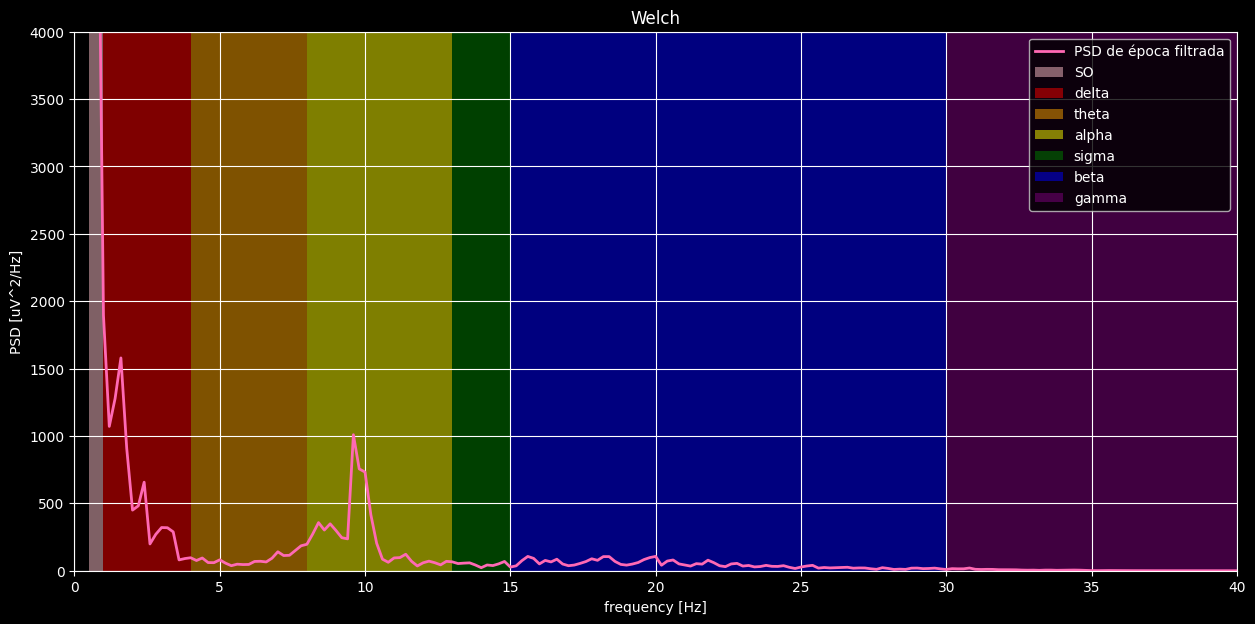

SO: 50909.85968630278
delta: 2664.0649214950995
theta: 401.2280934904643
alpha: 1209.5424767077463
sigma: 216.472327011522
beta: 220.96132463924053
gamma: 6.356688742256307


In [ ]:
nper=int(fs*5)
C3_epoca_S7=C3_epoch_NREM_S7[1]*1e6
f,PSD_test=power_spectral_density(fs,C3_epoca_S7,nper)
plt.figure(figsize = (15,7))
plt.plot(f,PSD_test , label='PSD de época filtrada', color='hotpink',linewidth=2)
plt.axvspan(banda_limites['SO'][0], banda_limites['SO'][1], facecolor='pink', label='SO', alpha=0.5)
plt.axvspan(banda_limites['delta'][0], banda_limites['delta'][1], facecolor='red', label='delta',alpha=0.5)
plt.axvspan(banda_limites['theta'][0], banda_limites['theta'][1], facecolor='orange', label='theta',alpha=0.5)
plt.axvspan(banda_limites['alpha'][0], banda_limites['alpha'][1], facecolor='yellow', label='alpha',alpha=0.5)
plt.axvspan(banda_limites['sigma'][0], banda_limites['sigma'][1], facecolor='green', label='sigma',alpha=0.5)
plt.axvspan(banda_limites['beta'][0], banda_limites['beta'][1], facecolor='blue', label='beta',alpha=0.5)
plt.axvspan(banda_limites['gamma'][0], banda_limites['gamma'][1], facecolor='purple', label='gamma',alpha=0.5)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [uV^2/Hz]')
plt.title('Welch')
plt.xlim([0, 40])
plt.ylim([0, 4000])
plt.legend()
plt.grid()
plt.show()

SO_power,delta_power,theta_power,alpha_power, sigma_power, beta_power, gamma_power=AUC_por_banda(f,PSD_test,banda_limites)
print("SO:",SO_power)
print("delta:",delta_power)
print("theta:",theta_power)
print("alpha:",alpha_power)
print("sigma:",sigma_power)
print("beta:",beta_power)
print("gamma:",gamma_power)

In [ ]:
SPE_test=spe(C3_epoca_S7,fs,PSD_test,f,percentile=90)
print(SPE_test)

1.6


In [ ]:
SE_test=spectral_entropy(PSD_test)
print(SE_test)

-1631854.537493026


####Aplico en todas las épocas de EEG

##### SN007

In [ ]:
features_C3_S7=aplico_features_EEG(C3_epoch_NREM_S7,nper,banda_limites)

print(features_C3_S7)
print("Cantidad de features para EEG:", len(features_C3_S7[0]))
print("Cantidad de filas (debe ser igual a la cantidad de épocas NREM):",len(features_C3_S7))

[[287, 55099.561154026036, 2727.26986050466, 577.0793471947856, 1107.877918661192, 293.04800713295754, 232.41577226227596, 9.466710054013538, 2.0, 97.75442097596544, 0.07776121597337578, 54861.319522318394, 423519892.71527267], [351, 50909.85968630278, 2664.0649214950995, 401.2280934904643, 1209.5424767077463, 216.472327011522, 220.96132463924053, 6.356688742256307, 1.6, 88.98265298975673, 0.089615110546958, 36263.50853147001, 279998610.90531063], [341, 30398.54449744656, 1394.7012933780534, 361.72194427571634, 1402.300196322213, 177.52926253343875, 199.0928565988531, 4.590389591653112, 9.600000000000001, 80.46098363875232, 0.13398427261615556, 15429.380867811564, 118528727.93785045], [412, 24691.572740553132, 981.1726224269496, 393.68551346729475, 1206.7320180628667, 291.64699774528043, 239.077217796788, 4.5509752121800355, 9.600000000000001, 71.50132070535422, 0.1408239120959378, 14792.838494894828, 113636682.5466422], [495, 13251.325118690234, 779.6790385272581, 459.78142248095224, 

####Aplico en todas las épocas de EOG

##### SN007

In [ ]:
features_EOG_S7=aplico_features_EOG(EOG1_epoch_NREM_S7,nper)

print(features_EOG_S7)
print("Cantidad de features para EOG:", len(features_EOG_S7[0]))
print("Cantidad de filas (debe ser igual a la cantidad de épocas NREM):",len(features_EOG_S7))

[[0.7307559603923363, 0.9999417576038615, 177197.59713671738, 0.022781314823144255, 69, -11566227.674914237], [0.7508443298435951, 0.9998986956351043, 134247.31742906416, 0.027072185028605558, 117, -9054661.383043293], [0.7254119660808167, 0.9997964200246378, 116319.09338073595, 0.02519734297483184, 66, -7811399.545481158], [0.752839275400939, 0.9999994005798358, 153028.7442845769, 0.021038565832130655, 80, -11143304.875260334], [0.7560762382565237, 0.9999946052125451, 112232.18832904963, 0.02380539619299427, 138, -8078217.790793189], [0.7535098569836913, 0.999954480294275, 106180.20981821996, 0.022937675183381676, 87, -6364631.370371556], [0.7230640452885423, 0.9998026839330539, 353000.35297968175, 0.014758036795028556, 28, -27269517.969921615], [0.7415171031629921, 0.9998437903820634, 85598.04088098537, 0.023261874260808023, 56, -4455096.810987024], [0.7234592760654879, 0.9999656370535417, 32818.79670050286, 0.03848730688557775, 96, -1850025.9571853902], [0.7451363043190233, 0.999997

#### Aplico en todas las épocas de EMG

##### SN007

In [ ]:
features_EMG_S7=aplico_features_EMG(EMG_epoch_NREM_S7,nper)

print(features_EMG_S7)
print("Cantidad de features para EMG:", len(features_EMG_S7[0]))
print("Cantidad de filas (debe ser igual a la cantidad de épocas NREM):",len(features_EMG_S7))

[[0.9998941936525287, 7334.934528712331, 1.116332549585345, 2688, -83047.3400073496, 81.4], [0.9999897119696622, 4050.604826370291, 1.151767605526875, 2640, -77483.09980722095, 80.80000000000001], [0.9999483146921082, 1517.5559636376017, 1.0173056571692178, 2667, -25462.883989303424, 76.4], [0.9999729769953741, 1449.4682258334979, 1.005333596502446, 2572, -24303.486813413336, 75.60000000000001], [0.9999752279058814, 1443.8713120988223, 1.0221072514544784, 2595, -24281.268095178264, 75.4], [0.9999417576038615, 2764.3789159839303, 1.1518827788408015, 2610, -48632.17483113563, 81.4], [0.9999116143157099, 1523.9831464759216, 1.0176863822824385, 2626, -25605.32789970865, 76.0], [0.9999832528721146, 1511.4995516075985, 1.019970107815505, 2664, -25687.907721530995, 75.4], [0.9999773809485235, 1785.1363758870243, 1.0245524972016946, 2611, -31741.560863212304, 77.0], [0.9999656370535417, 1780.7843637779524, 1.0222113151315442, 2666, -30856.030675447975, 76.60000000000001], [0.9998651262786924, 

####Total de Features

In [ ]:
A_S7=features_C3_S7
B_S7=features_EOG_S7
C_S7=features_EMG_S7
features_S7_trial_1= np.hstack((A_S7, B_S7, C_S7))
features_matriz=features_S7_trial_1

In [ ]:
#Por lo tanto disponemos de:
print("Nro. épocas para entrenamiento:",features_matriz.shape[0])
print("Nro. de features para entrenamiento:",features_matriz.shape[1])

Nro. épocas para entrenamiento: 814
Nro. de features para entrenamiento: 25


In [ ]:
#Recordamos cuántas épocas tenemos por fase de sueño
print("Cant. de épocas W:",len(indices_W_S7))
print("Cant. de épocas F1:",len(indices_F1_S7))
print("Cant. de épocas F2:",len(indices_F2_S7))
print("Cant. de épocas F3:",len(indices_F3_S7))

Cant. de épocas W: 65
Cant. de épocas F1: 87
Cant. de épocas F2: 474
Cant. de épocas F3: 191


###Desarrollo de modelos

In [ ]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [ ]:
X=features_matriz
Y=scoring_NREM_S7.copy()
del Y[-1]
del Y[:2]
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state=0)

La elección de los modelos se basó según los autores (Satapathy et al.,2024) y (Christos et al.,2018), que sostienen que los mejores resultados suelen obtenerse al implementar Random Forest (RF).

Además, se debe tener en cuenta que el RF se usa comúnmente para reducir la variación dentro de un conjunto de datos ruidoso, por lo que resulta conveniente para trabajar con señales de EEG. Por lo cual, resulta interesante observar si obtenemos resultados igual de buenos en comparación a los autores.

Por otro lado, teniendo en cuenta que RF consiste en un conjunto de Árboles de  Decisión (DT), se eligió DT como segundo tipo de modelo de clasificación. De esta manera, podemos realizar un análisis comparativo evaluando cómo se modifican los resultados al implementar un único DT y múltiples DT (RF).

In [ ]:
nombres_clases={'W':0,'F1':-1,'F2':-2,'F3':-3}

clf_DT=DecisionTreeClassifier(random_state=0)
clf_DT.fit(X_train, y_train)

y_pred_DT= clf_DT.predict(X_test)
cm_DT= confusion_matrix(y_test, y_pred_DT)

In [ ]:
clf_RF = RandomForestClassifier(max_depth=3, random_state=0)
clf_RF.fit(X_train, y_train)

y_pred_RF= clf_RF.predict(X_test)
cm_RF = confusion_matrix(y_test, y_pred_RF)

#RESULTADOS

####Decision Tree

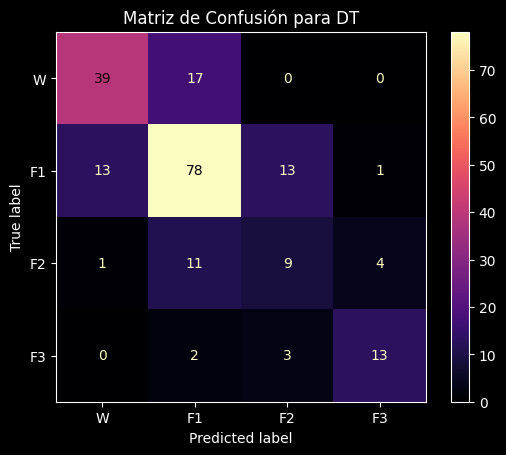

In [ ]:
matriz_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT, display_labels=nombres_clases)
matriz_DT.plot(cmap="magma")
plt.title("Matriz de Confusión para DT")
plt.show()

####Random Forest

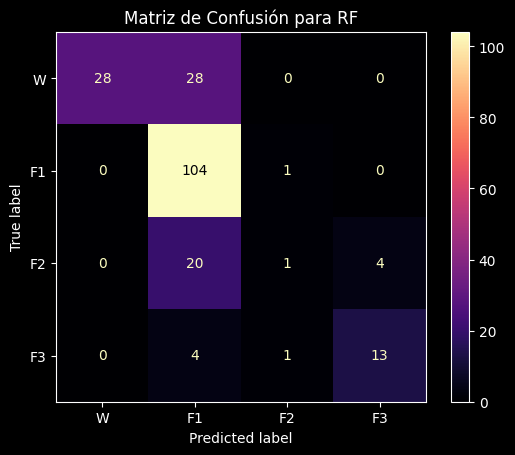

In [ ]:
matriz_RF =ConfusionMatrixDisplay(confusion_matrix=cm_RF, display_labels=nombres_clases)
matriz_RF.plot(cmap="magma")
plt.title("Matriz de Confusión para RF")
plt.show()

###Evaluación de Modelos

Ahora vamos a poner prueba los mismos modelos pero esta vez utilizando el set de entrenamiento.

####Decision Tree

In [ ]:
y_pred_DT_test= clf_DT.predict(X_train)
cm_DT_test= confusion_matrix(y_train, y_pred_DT_test)

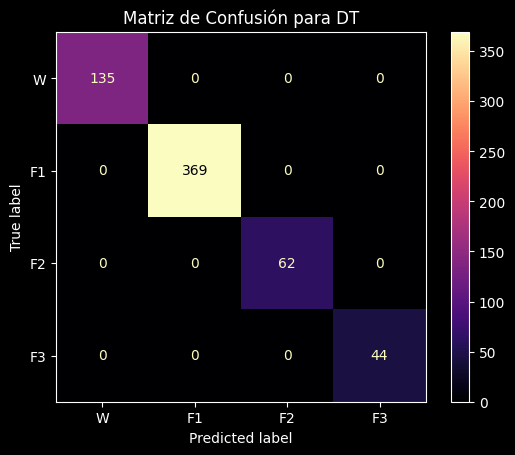

In [ ]:
matriz_DT = ConfusionMatrixDisplay(confusion_matrix=cm_DT_test, display_labels=nombres_clases)
matriz_DT.plot(cmap="magma")
plt.title("Matriz de Confusión para DT")
plt.show()

Podemos ver que con respecto a la matriz de confusión, los aciertos son muchísimo mayores. Esto implica que el modelo presenta un *overfit*, de manera tal que no logró aprender a generalizar, pero aprendió "de memoria" el set de entrenamiento.

####Random Forest


In [ ]:
y_pred_RF_test= clf_RF.predict(X_train)
cm_RF_test = confusion_matrix(y_train, y_pred_RF_test)

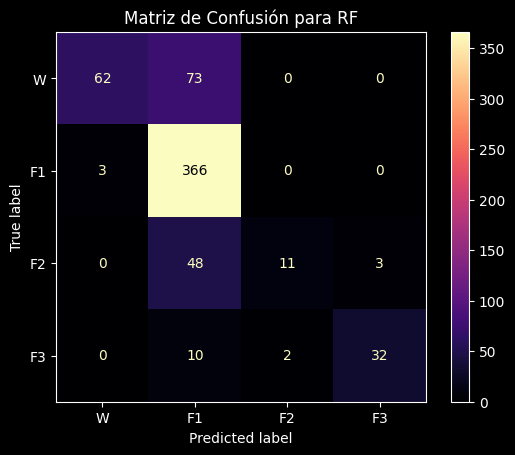

In [ ]:
matriz_RF_test =ConfusionMatrixDisplay(confusion_matrix=cm_RF_test, display_labels=nombres_clases)
matriz_RF_test.plot(cmap="magma")
plt.title("Matriz de Confusión para RF")
plt.show()

En este caso, ocurre lo mismo mencionado anteriormente. El modelo presenta *overfit*, pero la diferencia es apenas un poco menor entre ambos.

###Comparación de modelos

In [ ]:
print('Reporte Árboles de Decisión')
print(classification_report(y_test, y_pred_DT, target_names=nombres_clases))

print('\n Reporte Random Forest')
print(classification_report(y_test, y_pred_RF, target_names=nombres_clases))

Reporte Árboles de Decisión
              precision    recall  f1-score   support

           W       0.78      0.75      0.76        56
          F1       0.75      0.84      0.79       105
          F2       0.37      0.28      0.32        25
          F3       0.57      0.44      0.50        18

    accuracy                           0.71       204
   macro avg       0.62      0.58      0.59       204
weighted avg       0.70      0.71      0.70       204


 Reporte Random Forest
              precision    recall  f1-score   support

           W       0.97      0.68      0.80        56
          F1       0.72      0.99      0.84       105
          F2       0.67      0.08      0.14        25
          F3       0.78      0.78      0.78        18

    accuracy                           0.77       204
   macro avg       0.79      0.63      0.64       204
weighted avg       0.79      0.77      0.74       204



####Accuracy para diferentes divisiones aleatorias

In [ ]:
DT_score_cv=cross_val_score(clf_DT,X,Y,cv=5)
RF_score_cv=cross_val_score(clf_RF,X,Y,cv=5)

print("Árboles de decisión:", DT_score_cv)
print("Accuracy para DT (Media): %0.2f (+/- %0.2f)" % (DT_score_cv.mean(), DT_score_cv.std() * 2))

print("\nRandom Forest:", RF_score_cv)
print("Accuracy para RF (Media): %0.2f (+/- %0.2f)" % (RF_score_cv.mean(), RF_score_cv.std() * 2))

Árboles de decisión: [0.56441718 0.63803681 0.67484663 0.74846626 0.5308642 ]
Accuracy para DT (Media): 0.63 (+/- 0.16)

Random Forest: [0.65644172 0.7607362  0.64417178 0.80981595 0.66666667]
Accuracy para RF (Media): 0.71 (+/- 0.13)


####Scores

In [ ]:
cv_DT = cross_validate(clf_DT,X,Y,cv=3)
cv_RF = cross_validate(clf_RF,X,Y,cv=3)

print("Árboles de Decisión:")
print("fit time:", cv_DT['fit_time'])
print("score time:", cv_DT['score_time'])
print("Accuracy:", cv_DT['test_score'])

print("\n Random Forest:")
print("fit time:", cv_RF['fit_time'])
print("score time:", cv_RF['score_time'])
print("Accuracy:", cv_RF['test_score'])

Árboles de Decisión:
fit time: [0.01653266 0.01665664 0.01385975]
score time: [0.00122952 0.00125074 0.00109267]
Accuracy: [0.64338235 0.62730627 0.63837638]

 Random Forest:
fit time: [0.22964382 0.22352576 0.22004914]
score time: [0.00976896 0.01217771 0.00809741]
Accuracy: [0.69852941 0.71217712 0.76752768]


#CONCLUSIONES

En cuanto a los resultados obtenidos se puede concluir lo siguiente:


*   Si bien el nivel de accuracy deseado no fue alcanzado, el accuracy obtenido por RF es ligeramente mayor al obtnido por DT.
*   En general, los valores tales como precisión, recall, f1-score suelen ser bastante mayores para RF con respecto DT, a excepción de los valores obtenidos en recall y f1-score para F2.
*   A partir de la Evaluación de los Modelos, se puede ver que los modelos presentan overfitting debido a que el número de aciertos utilizando el set de entrenamiento como input es mucho mayor a los aciertos obtenidos utiliando el set de prueba. Esto implica que los modelos no están generalizando bien y prbablemente requierna mayor número de muestras para ser entrenadas.
*   En cuanto a los scores obtenidos, se puede ver que el fit time, como era esperable, es considerablemente mayor para RF debido a tener una mayor complejidad algoritmica, pero se compensa con valores más altos generales en los otros parámatros. Sin embargo, para este caso, los valores de accuracy no difieren significativamente entre sí. Por lo que incrementar la complejidad del algoritmo no provocó grandes cambios.

Algunos aspectos a mejorar del trabajo:

*   Emplear más sujetos para entrenar los modelos. Por motivos de memoria limitada habilitada en Google Colaboratory, trabajar con grandes bases de datos terminan por limitar el trabajo. Lo ideal sería entrenar con mayor con cantidad de épocas rovenientes de diferentes sujetos. De esta manera, el entrenamiento sería más generalizado y podría brindar resultados más representativos al momento de clasificar. Adicionalmente, esto podría resolver el problema de overfitting.
*   Trabajar con cantidades similares de inputs con outputs iguales. Es decir, que la cantidad de inputs cuyos outputs correspondan a Fase 2 no difiera tanto con la cantidad de inputs cuyos outputs correspondan al resto de las fases.

*   Modificar el algoritmo de manera tal que clasifique segun sistema NO ASSM, distinguiendo F3 y F4. Para ello, se requiere realizar un scoring sobre las épocas identificadas como F3 y definir si corresponde a F4. Esto puede ser un problema debido a que la cantidad de épocas clasificadas tanto F3 como para F4, quedaría bastante reducida. Para lograr que haya una cantidad pareja épocas clasificadas para cada fase, necesariamente se debería realizar estas modificaciones en distintos sujetos.

*   Extender este trabajo empleando una abordaje multicanal que incluya la señal de ECG para la elaboración de los modelos.














#Bibliografía

*   Haaglanden Medisch Centrum sleep staging database v1.1. (2022, 18 marzo). https://physionet.org/content/hmc-sleep-staging/1.1/
*  Satapathy, S. K., Brahma, B., Panda, B., Barsocchi, P., & Bhoi, A. K. (2024). Machine learning-empowered sleep staging classification using multi-modality signals. BMC Medical Informatics And Decision Making, 24(1). https://doi.org/10.1186/s12911-024-02522-2
*  Christos, T. (2018). Classification of Sleep Stages Using Machine Learning Methods. International Hellenic University.
*  Zhovna, I., & Shallom, I. D. (2008). Automatic detection and classification of sleep stages by multichannel EEG signal modeling. IEEE Engineering In Medicine And Biology Society. https://doi.org/10.1109/iembs.2008.4649750

*  Kaczorowska, M., Plechawska-Wojcik, M., Tokovarov, M., Dmytruk, R. (2017). Comparison of the ICA and PCA methods in correction of EEG signal artefacts.  International Symposium on Advanced Topics in Electrical Engineering (ATEE). http://dx.doi.org/10.1109/ATEE.2017.7905095









